In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

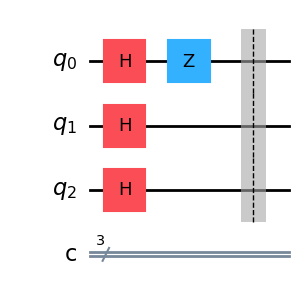

In [154]:
nqubit = 3
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(0)
qc.barrier()


qc.draw(output="mpl", style='iqp')

C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\2116223141.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in range(0,len(amplitudes)):


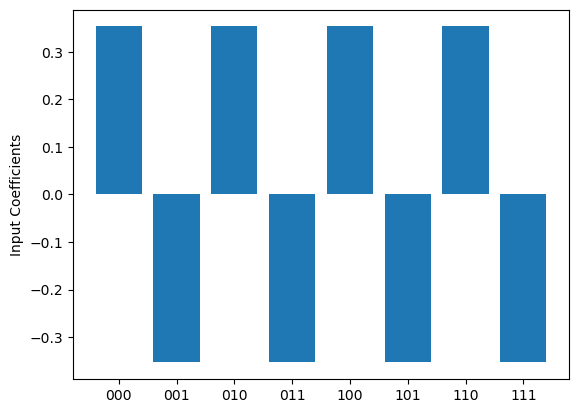

In [15]:
backend=Aer.get_backend('statevector_simulator')
result=execute(qc,backend).result()
statevector=result.get_statevector(qc)
amplitudes=(statevector)
# to use YYY as real arrays, use `np.asarray(YYY,float)`
binaries=[]
for i in range(0,len(amplitudes)):
    binaries +=['{0:03b}'.format(i)]
#plt.figure(figsize=(9,6))    
plt.bar(binaries,amplitudes)
plt.ylabel('Input Coefficients')
plt.show()

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()

C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\3520078309.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\3520078309.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
qcom = provider.get_backend('ibm_kyoto')


In [ ]:
job = execute(qc,backend=qcom).result()

In [ ]:
plot_histogram(job.get_counts(),title="Sin wave on IBM Quantum Computer")

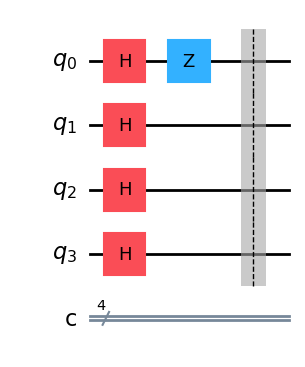

In [155]:
nqubit = 4
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(0)
qc.barrier()


qc.draw(output="mpl", style='iqp')

C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\3203973649.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in range(0,len(amplitudes)):


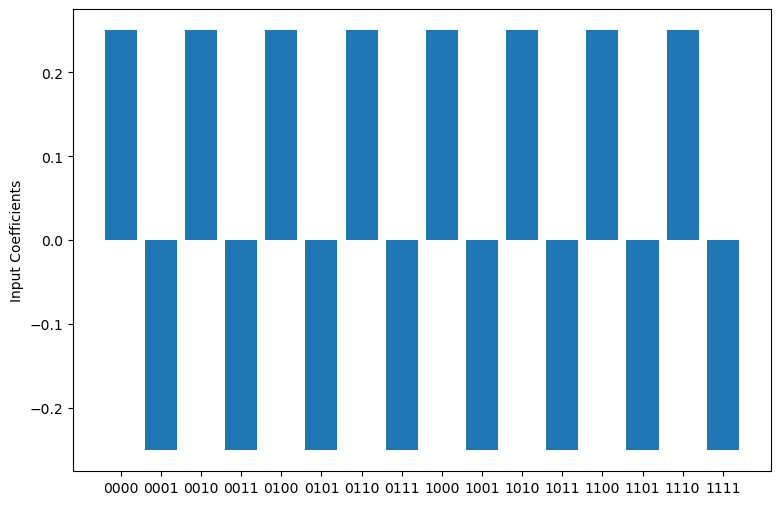

In [156]:
backend=Aer.get_backend('statevector_simulator')
result=execute(qc,backend).result()
statevector=result.get_statevector(qc)
amplitudes=(statevector)
# to use YYY as real arrays, use `np.asarray(YYY,float)`
binaries=[]
for i in range(0,len(amplitudes)):
    binaries +=['{0:04b}'.format(i)]
plt.figure(figsize=(9,6))    
plt.bar(binaries,amplitudes)
plt.ylabel('Input Coefficients')
plt.show()

In [157]:
def qft(qcn,nbits):
    for i in range(nbits-1,-1,-1):
        qcn.h(i)
        for j in range(i-1, -1, -1):
            qcn.cp(np.pi/(2**(i-j)),j,i)
    qcn.barrier()
    for i in range(int(nbits/2)):
        qcn.swap(i, nbits-1-i)


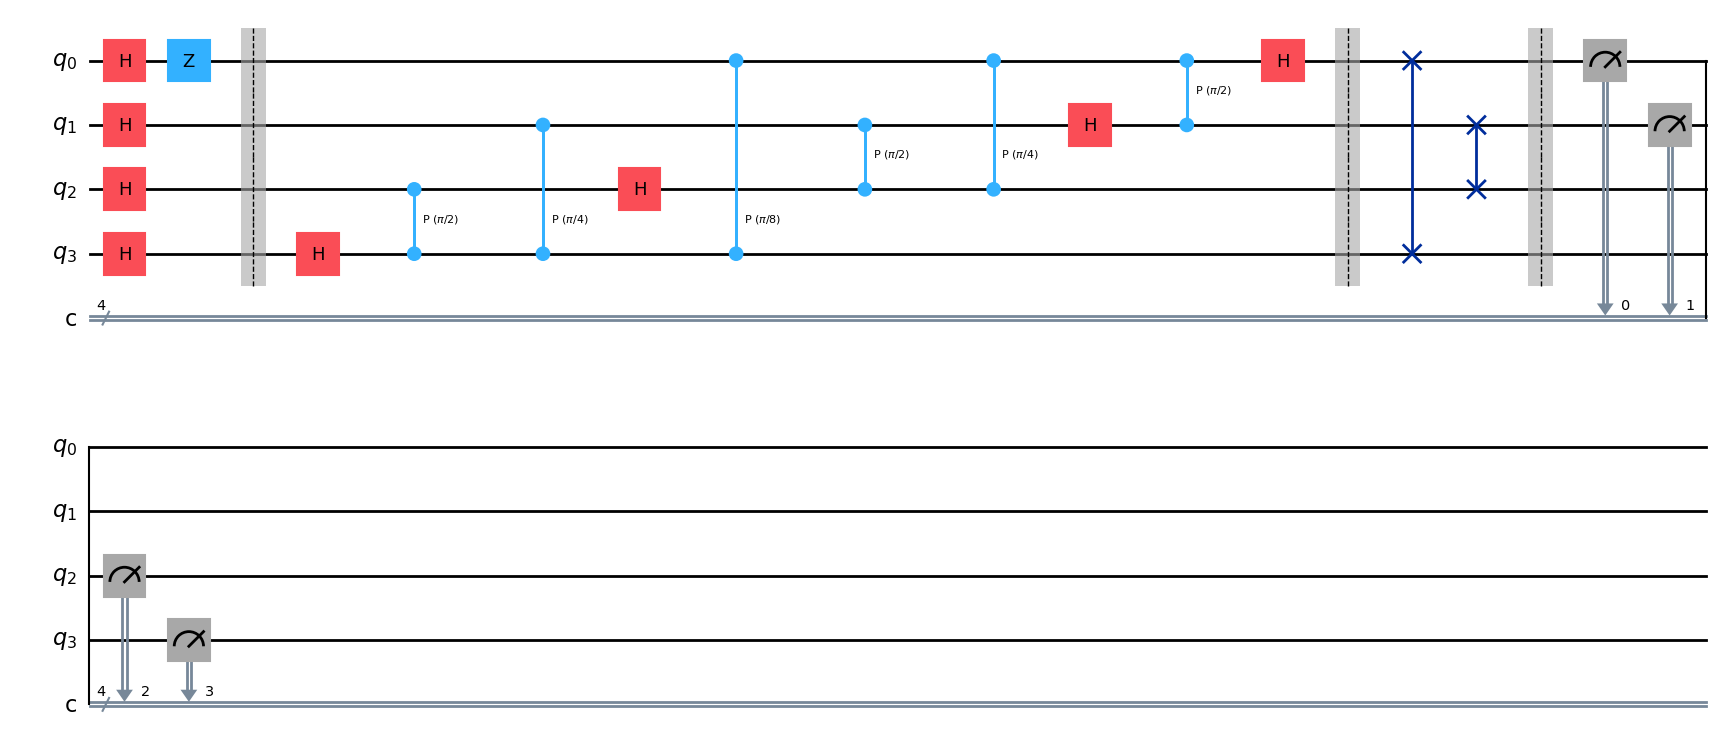

In [158]:
nbits = 4
qft(qc, nbits) #form the QFT circuit
qc.barrier()
for i in range(nbits):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

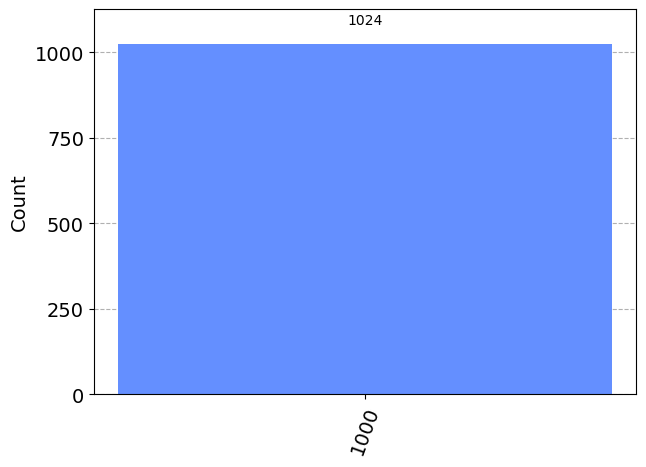

In [159]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [30]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_kyoto')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-16 00:10:01,608: Credentials are already in use. The existing account in the session will be replaced.


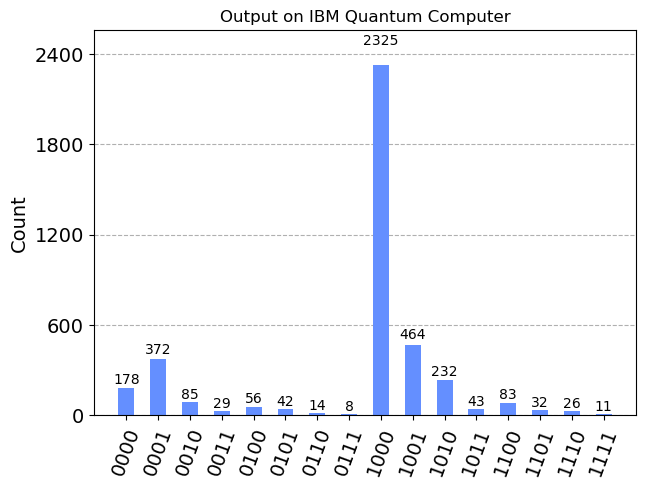

In [31]:
plot_histogram(job.get_counts(),title="Output on IBM Quantum Computer")

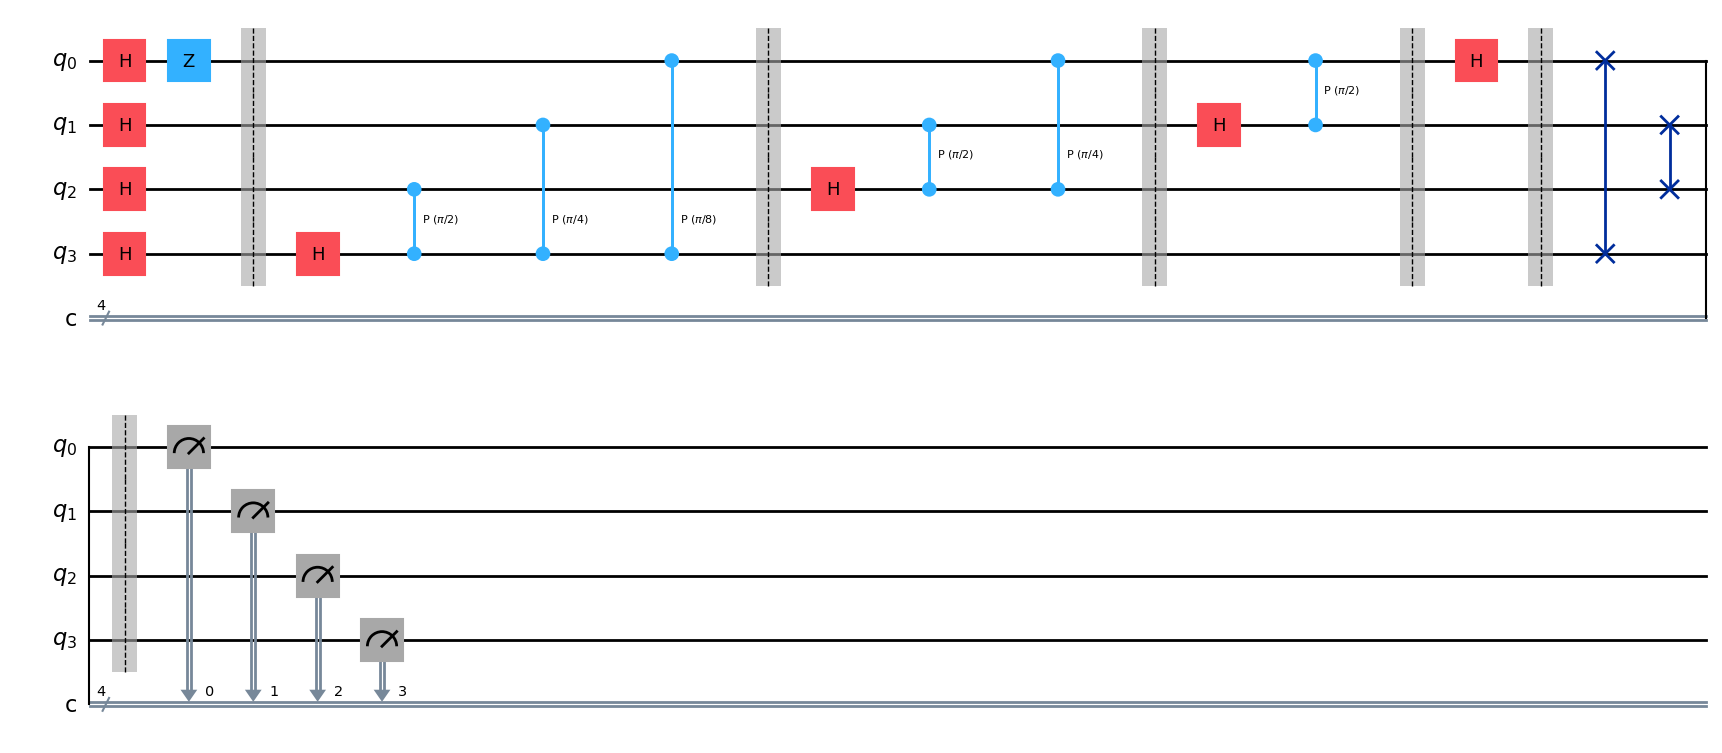

In [160]:
nqubit = 4
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(0)
qc.barrier()
qc.h(nqubit-1)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()

qc.h(nqubit-2)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()

qc.h(nqubit-3)
qc.cp(np.pi/2,0,1)
qc.barrier()

qc.h(nqubit-4)
qc.barrier()

qc.swap(0,3)
qc.swap(1,2)
qc.barrier()
for i in range(nqubit):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

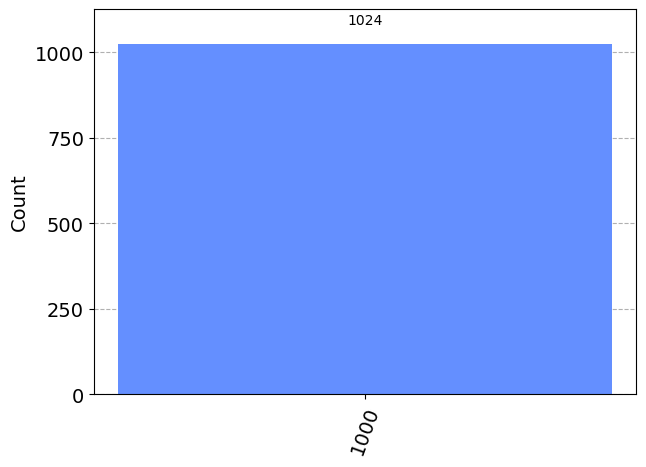

In [161]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [51]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_kyoto')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-16 13:21:34,620: Credentials are already in use. The existing account in the session will be replaced.


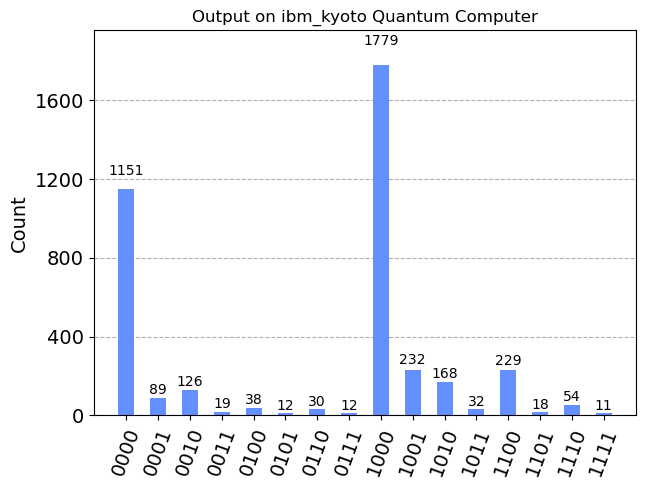

In [52]:
plot_histogram(job.get_counts(),title="Output on ibm_kyoto Quantum Computer")

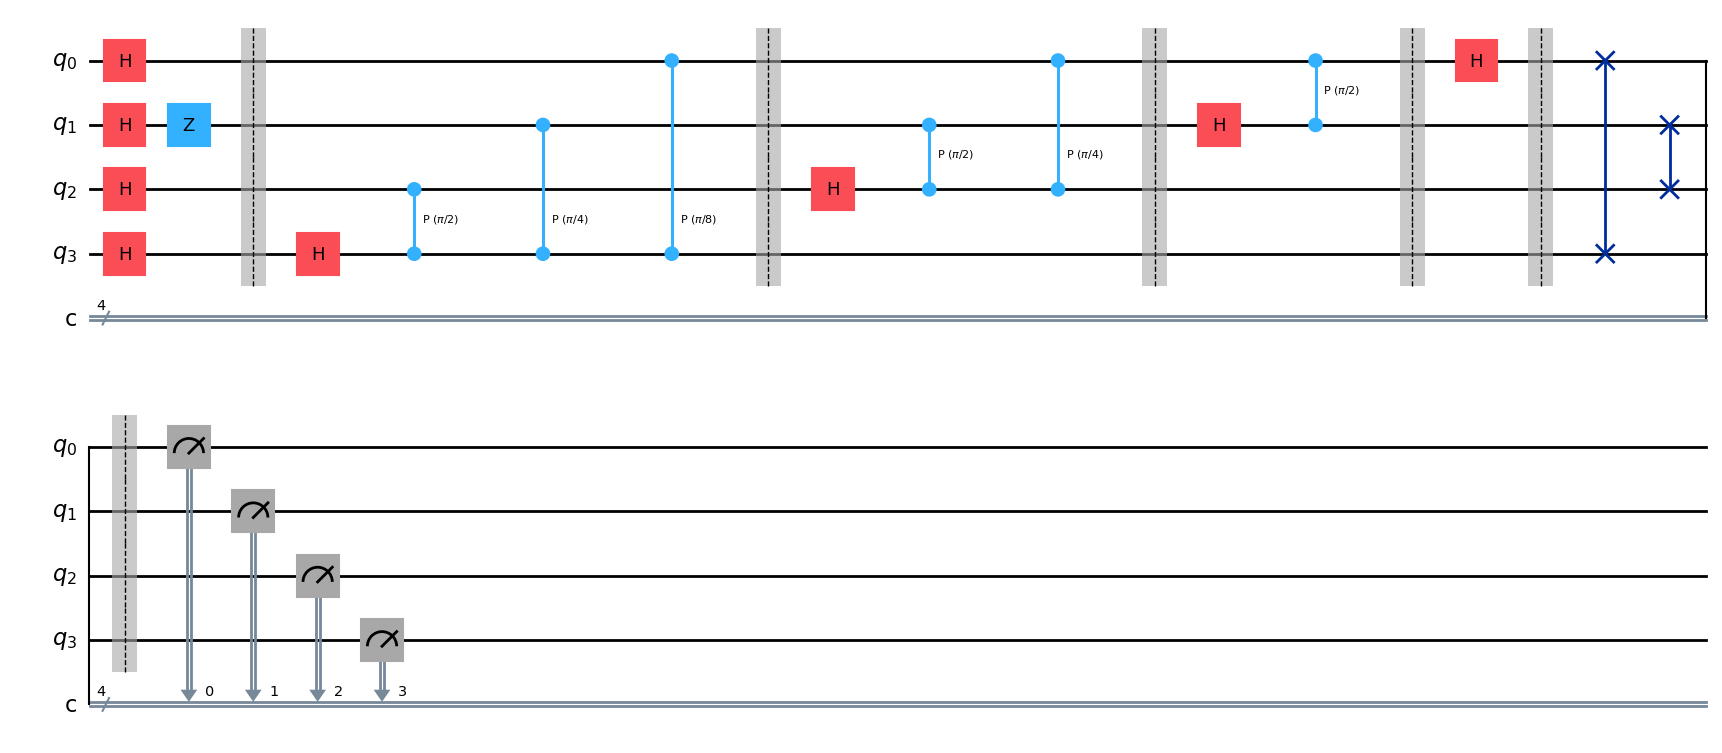

In [162]:
nbits = 4
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(1)
qc.barrier()

qc.h(nbits-1)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()

qc.h(nbits-2)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()

qc.h(nbits-3)
qc.cp(np.pi/2,0,1)
qc.barrier()

qc.h(nbits-4)
qc.barrier()

qc.swap(0,3)
qc.swap(1,2)
  
qc.barrier()
for i in range(nbits):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

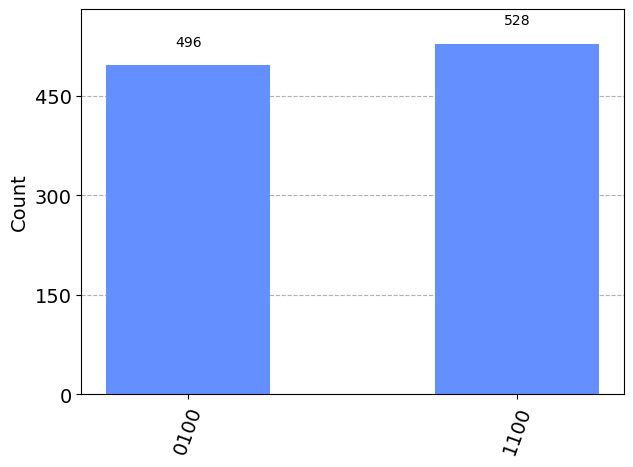

In [163]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [55]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_osaka')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-16 13:34:14,331: Credentials are already in use. The existing account in the session will be replaced.


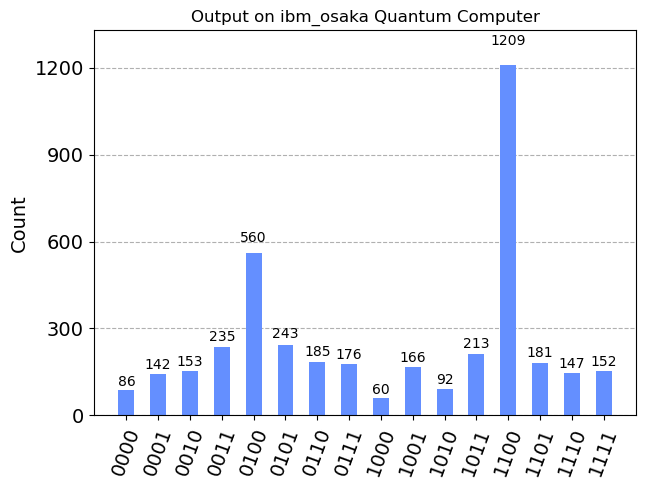

In [56]:
plot_histogram(job.get_counts(),title="Output on ibm_osaka Quantum Computer")

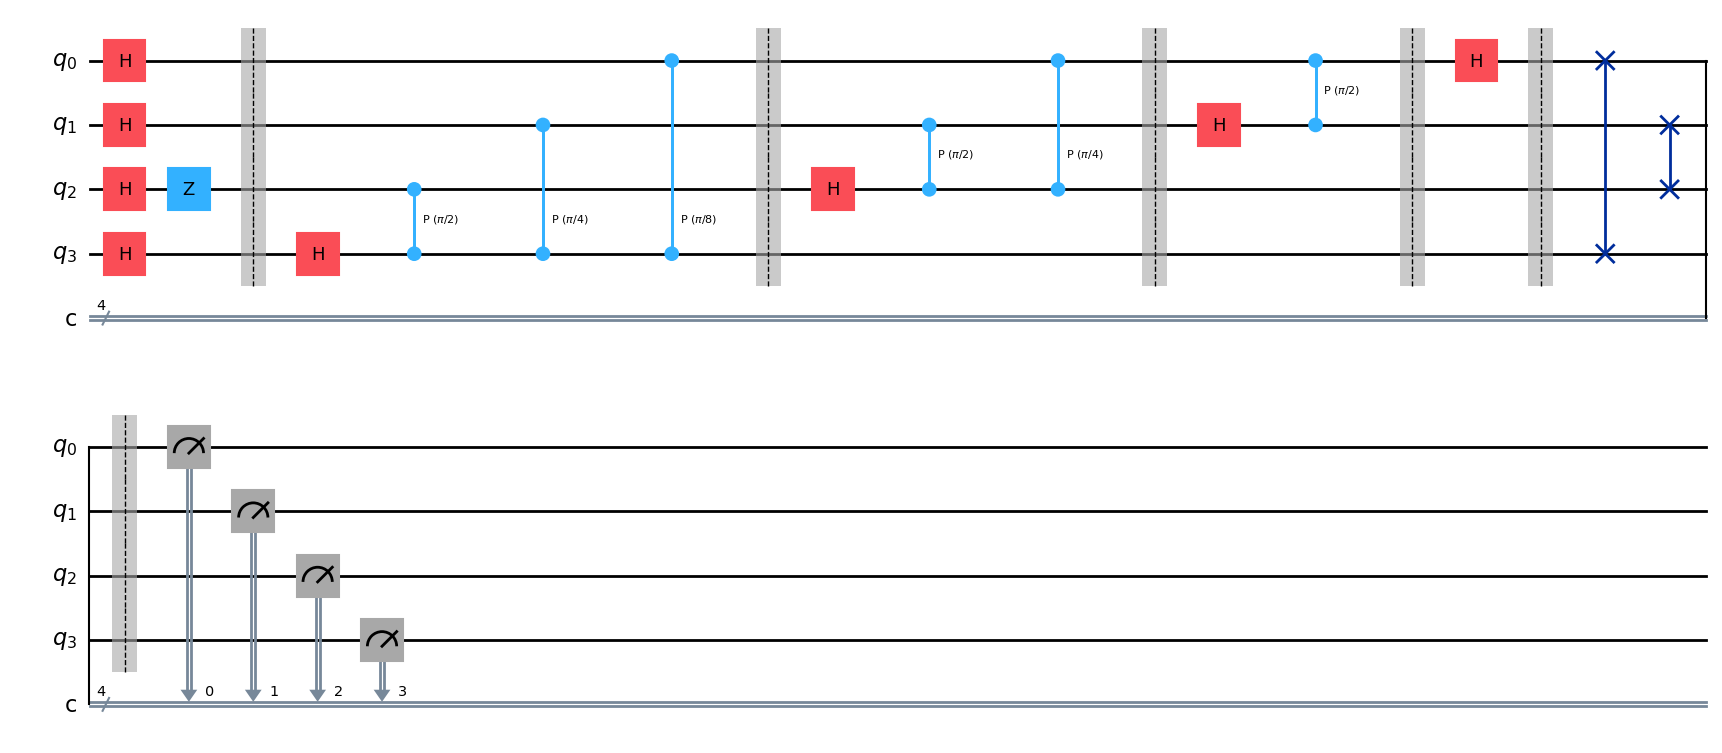

In [164]:
nbits = 4
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(2)
qc.barrier()

qc.h(nbits-1)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()

qc.h(nbits-2)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()

qc.h(nbits-3)
qc.cp(np.pi/2,0,1)
qc.barrier()

qc.h(nbits-4)
qc.barrier()

qc.swap(0,3)
qc.swap(1,2)
  
qc.barrier()
for i in range(nbits):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

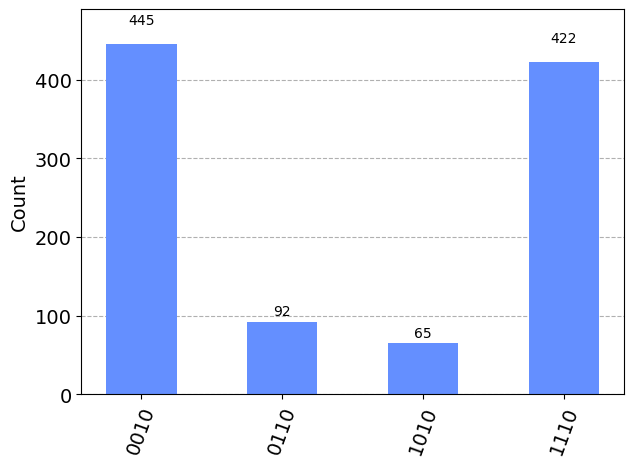

In [165]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [63]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_brisbane')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-16 14:46:30,464: Credentials are already in use. The existing account in the session will be replaced.


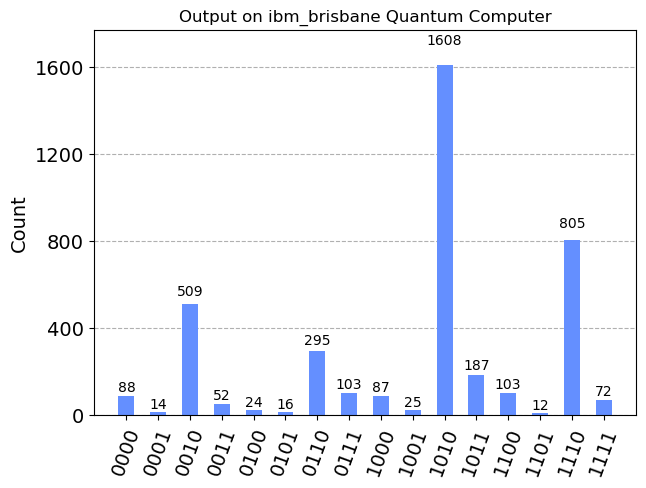

In [64]:
plot_histogram(job.get_counts(),title="Output on ibm_brisbane Quantum Computer")

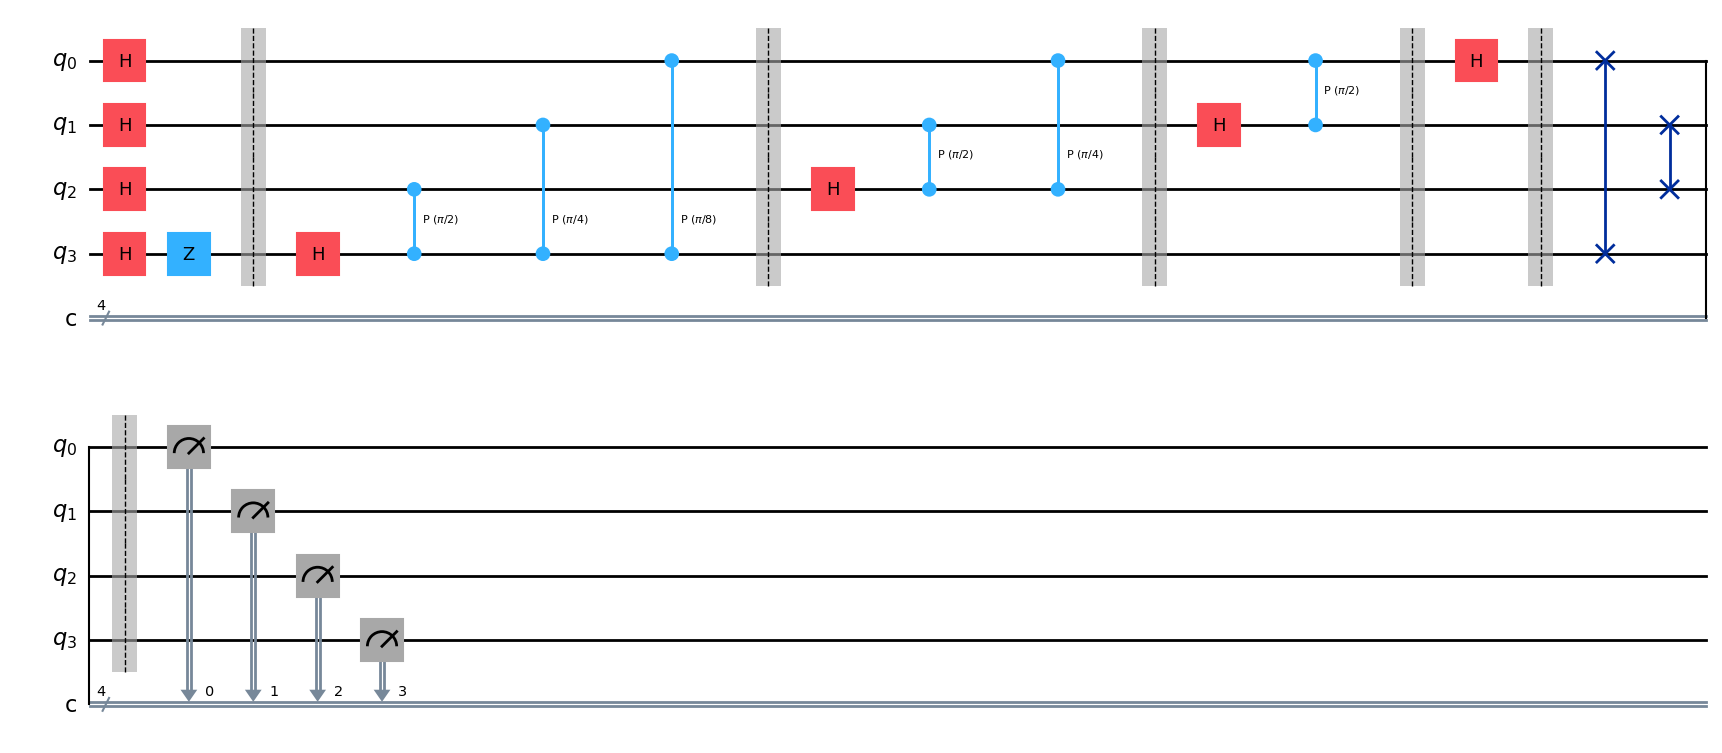

In [166]:
nbits = 4
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(3)
qc.barrier()

qc.h(nbits-1)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()

qc.h(nbits-2)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()

qc.h(nbits-3)
qc.cp(np.pi/2,0,1)
qc.barrier()

qc.h(nbits-4)
qc.barrier()

qc.swap(0,3)
qc.swap(1,2)
  
qc.barrier()
for i in range(nbits):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

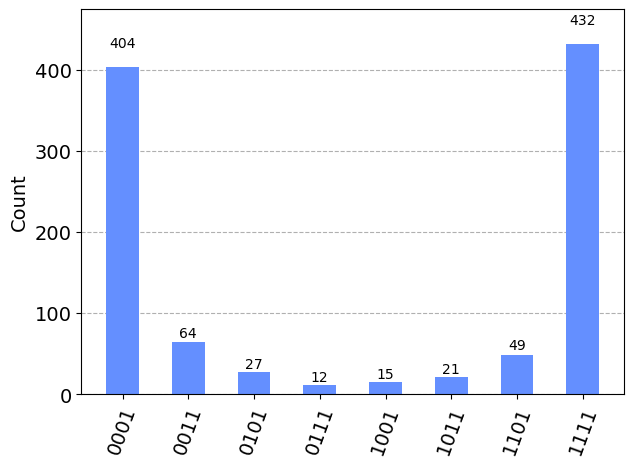

In [167]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [133]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_kyoto')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-17 09:29:29,788: Credentials are already in use. The existing account in the session will be replaced.


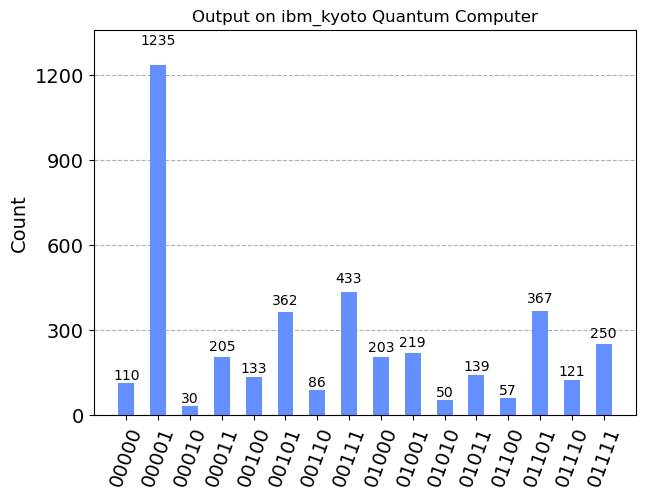

In [134]:
plot_histogram(job.get_counts(),title="Output on ibm_kyoto Quantum Computer")

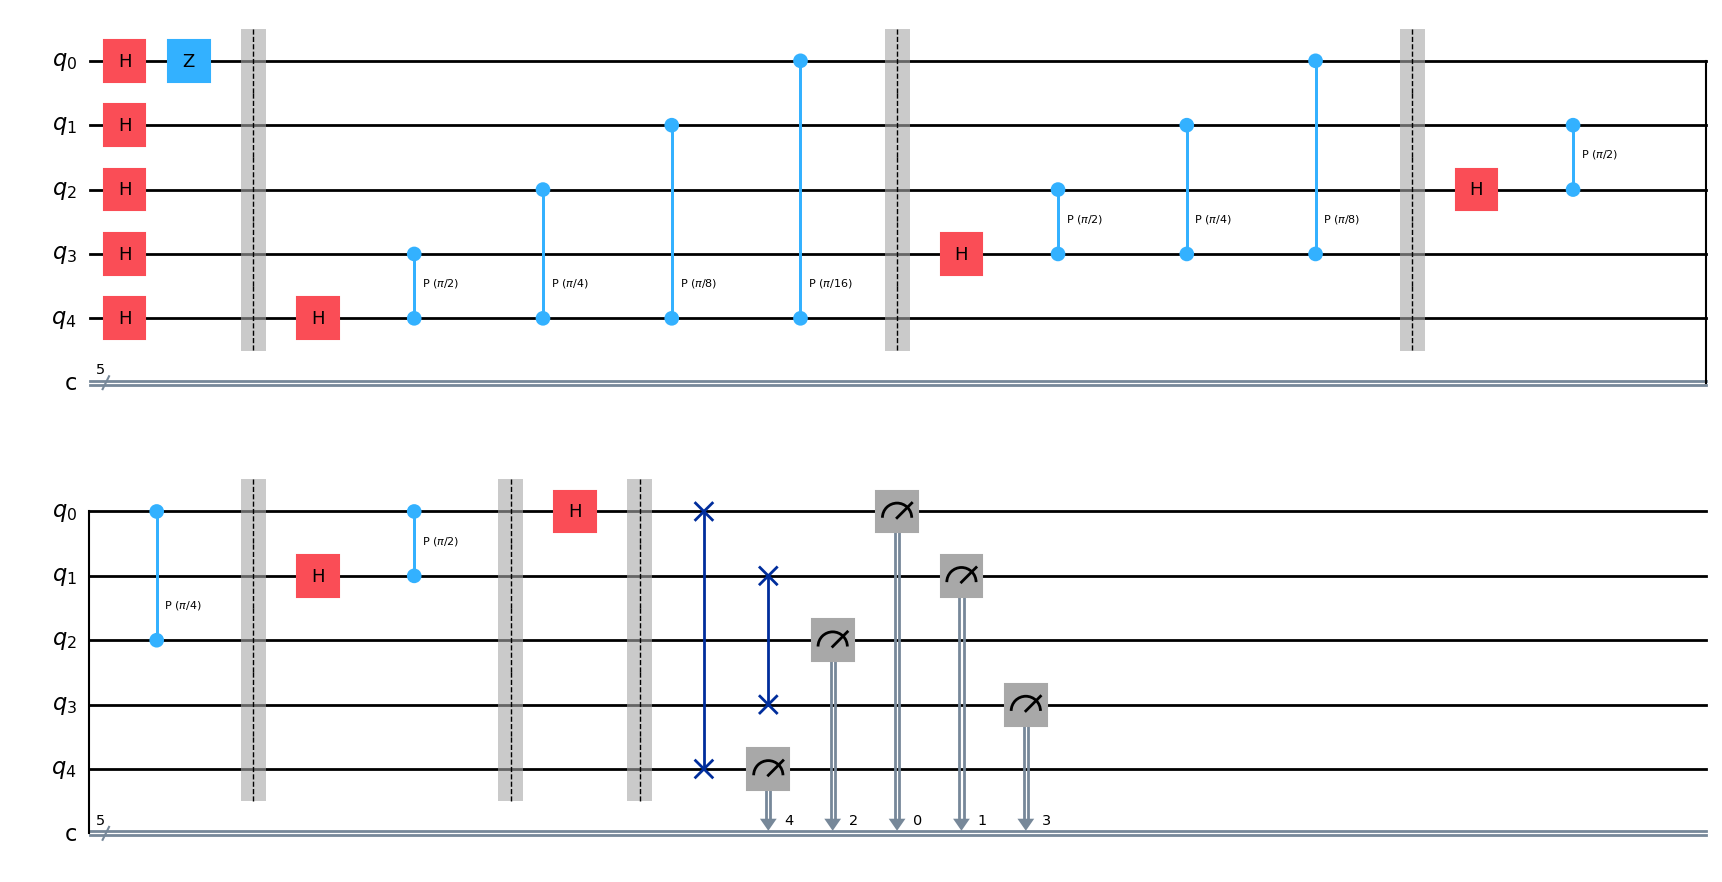

In [178]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(0)
qc.barrier()
qc.h(nqubit-1)
qc.cp(np.pi/2,3,4)
qc.cp(np.pi/4,2,4)
qc.cp(np.pi/8,1,4)
qc.cp(np.pi/16,0,4)
qc.barrier()
qc.h(nqubit-2)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()
qc.h(nqubit-3)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()
qc.h(nqubit-4)
qc.cp(np.pi/2,0,1)
qc.barrier()
qc.h(nqubit-5)
qc.barrier()
qc.swap(0,4)
qc.swap(1,3)
for i in range(nqubit):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

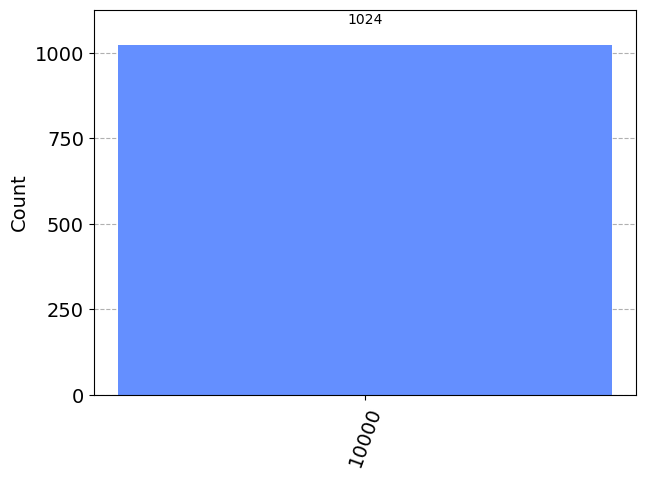

In [179]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [184]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_kyoto')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-17 17:42:27,197: Credentials are already in use. The existing account in the session will be replaced.


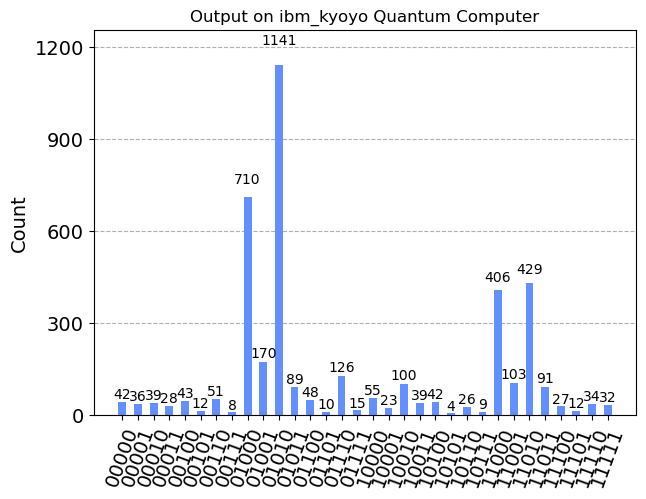

In [185]:
plot_histogram(job.get_counts(),title="Output on ibm_kyoyo Quantum Computer")

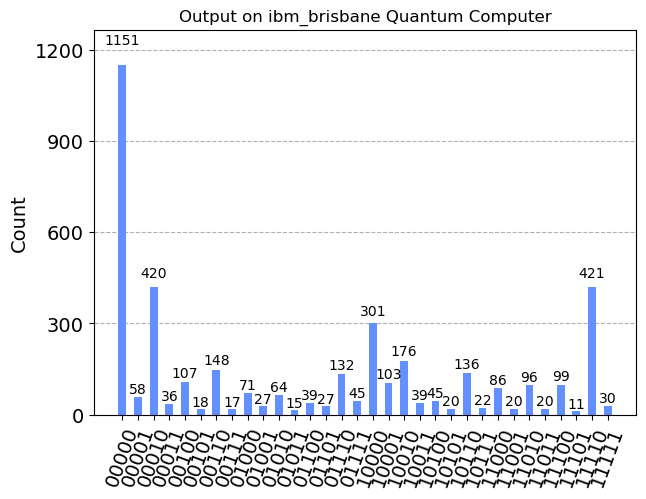

In [175]:
plot_histogram(job.get_counts(),title="Output on ibm_brisbane Quantum Computer")

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_brisbane')
job = execute(qc,backend=qcom).result()

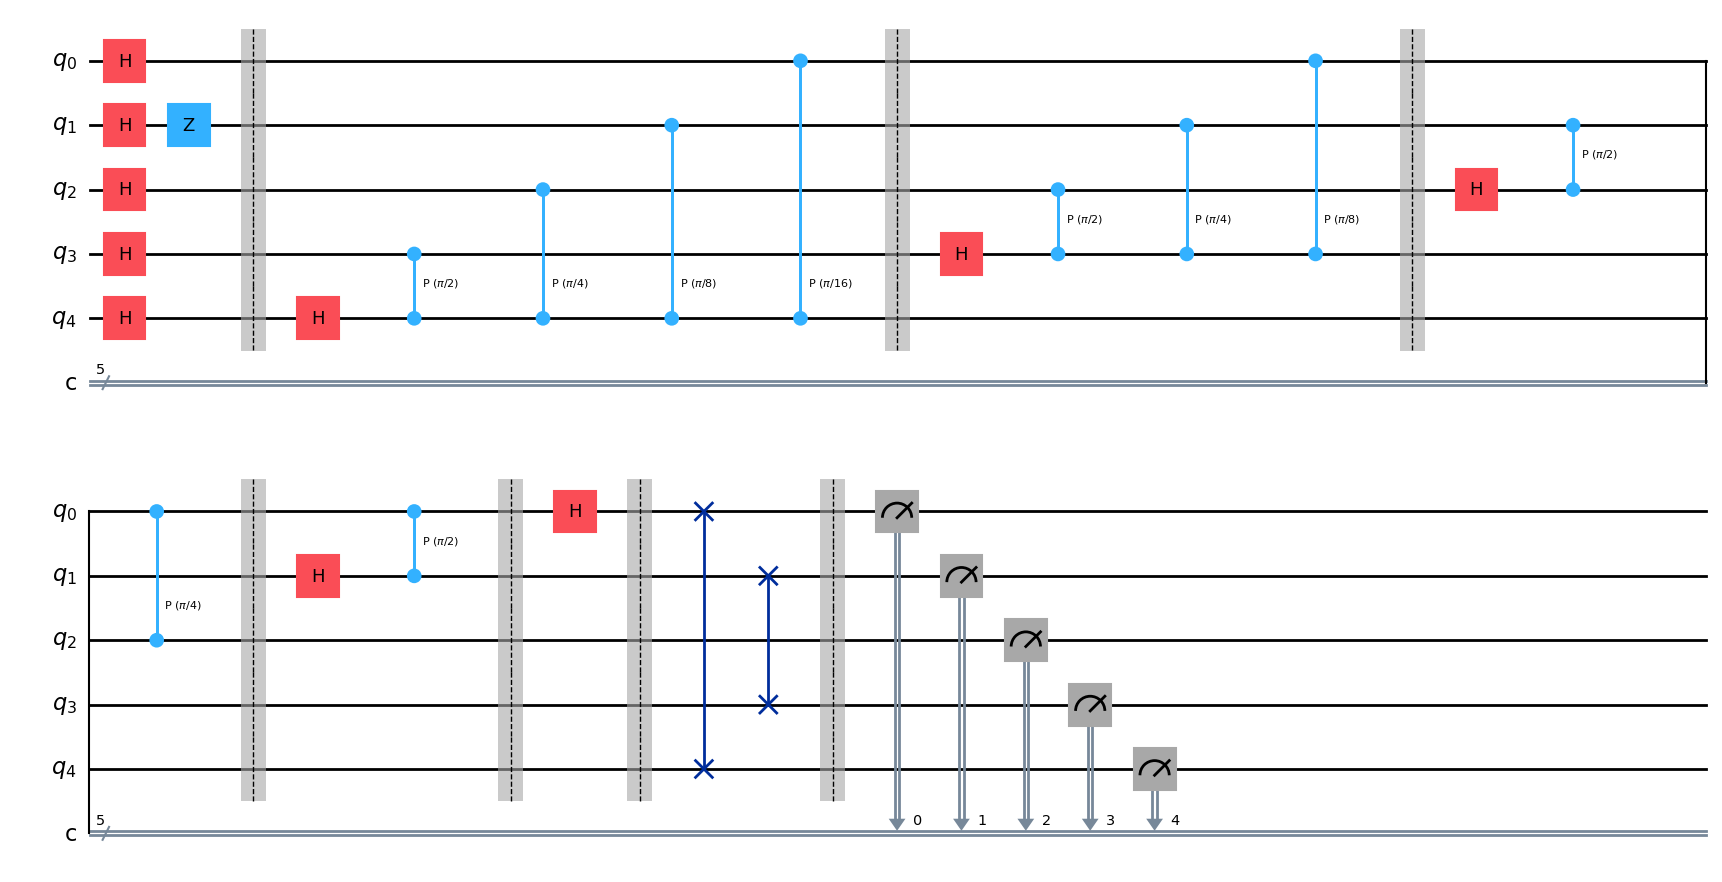

In [186]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(1)
qc.barrier()

qc.h(nqubit-1)
qc.cp(np.pi/2,3,4)
qc.cp(np.pi/4,2,4)
qc.cp(np.pi/8,1,4)
qc.cp(np.pi/16,0,4)
qc.barrier()

qc.h(nqubit-2)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()

qc.h(nqubit-3)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()

qc.h(nqubit-4)
qc.cp(np.pi/2,0,1)
qc.barrier()

qc.h(nqubit-5)
qc.barrier()

qc.swap(0,4)
qc.swap(1,3)
  
qc.barrier()
for i in range(nqubit):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

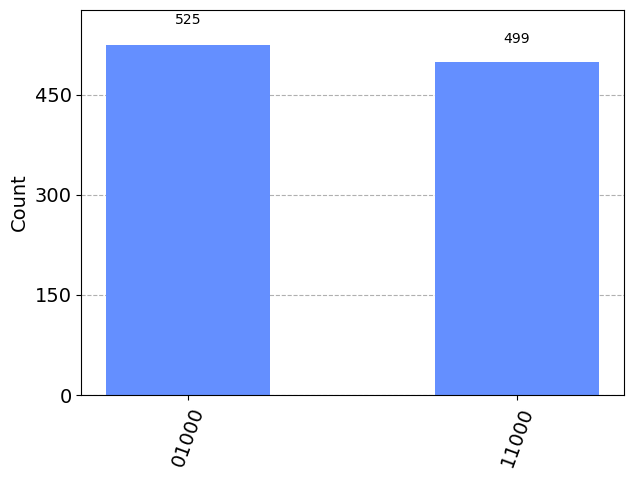

In [187]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [188]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_osaka')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-17 18:06:02,289: Credentials are already in use. The existing account in the session will be replaced.


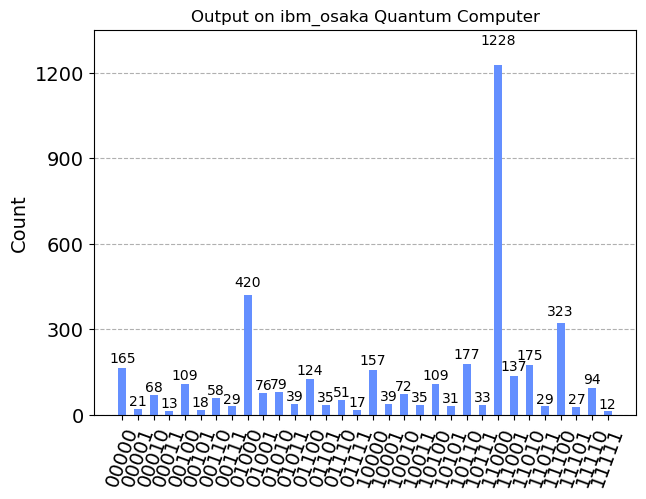

In [189]:
plot_histogram(job.get_counts(),title="Output on ibm_osaka Quantum Computer")

In [190]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_kyoto')
job = execute(qc,backend=qcom).result()

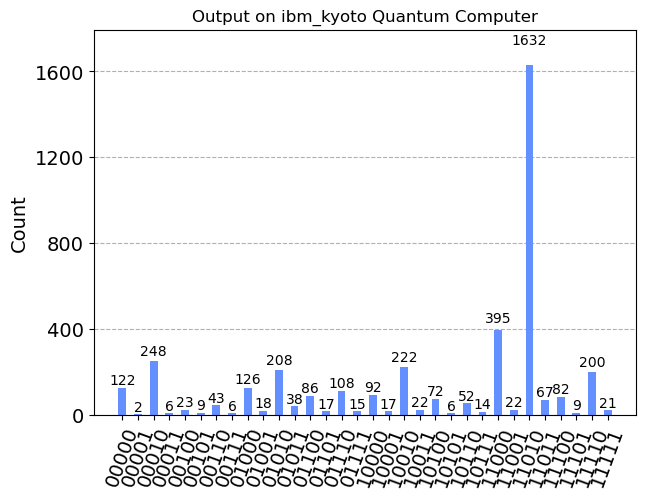

In [191]:
plot_histogram(job.get_counts(),title="Output on ibm_kyoto Quantum Computer")

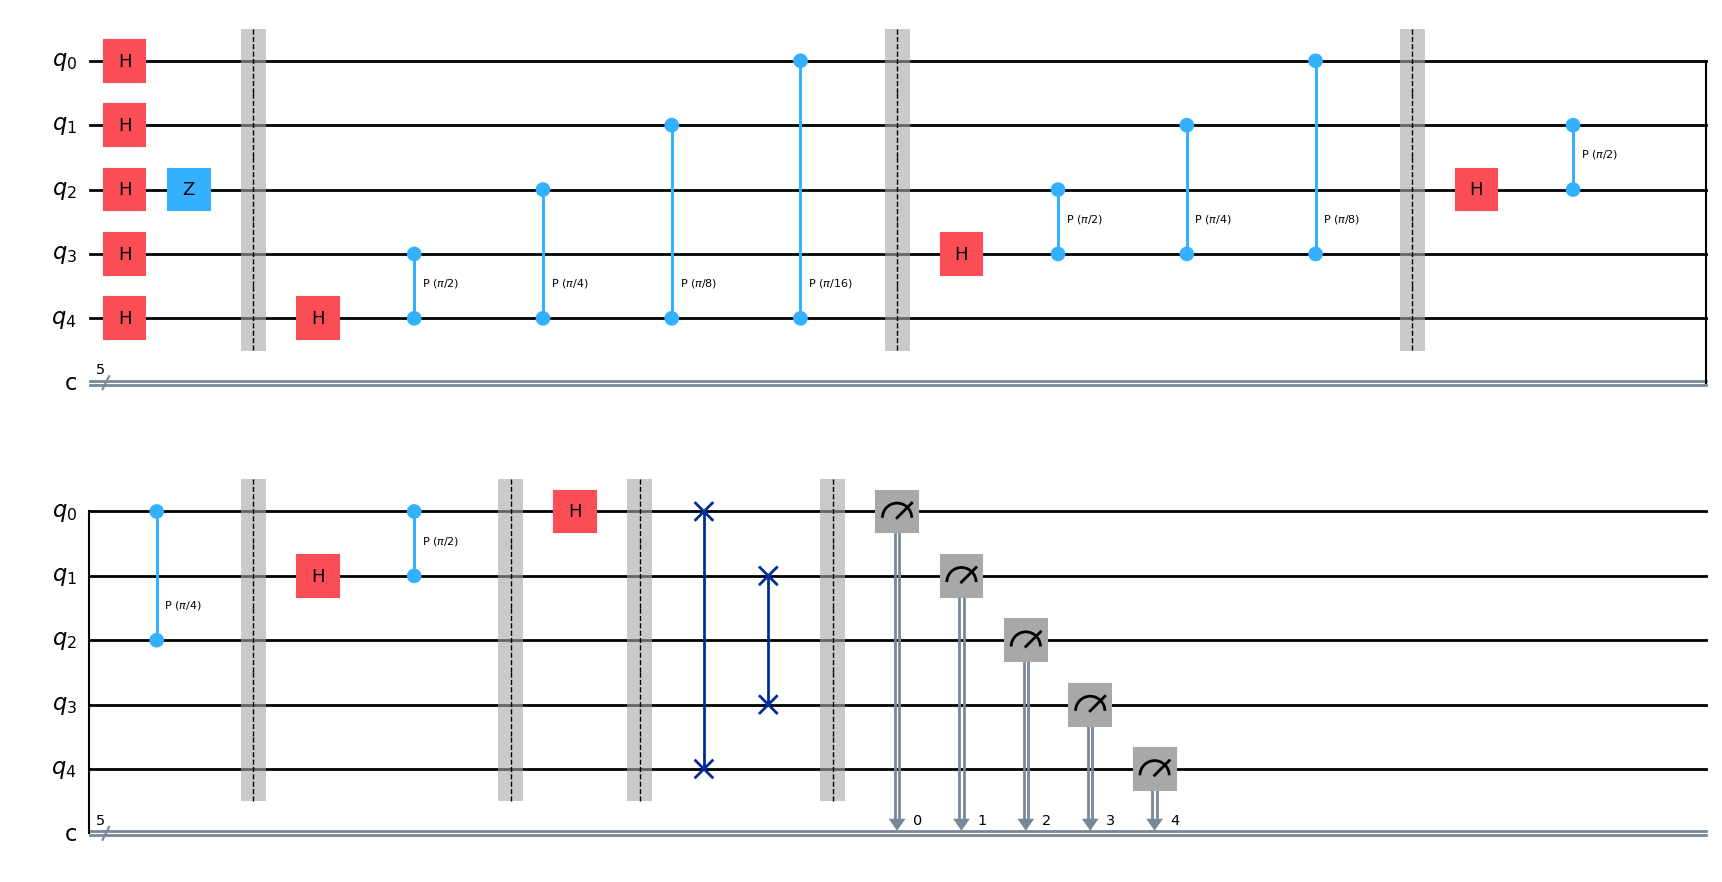

In [192]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(2)
qc.barrier()

qc.h(nqubit-1)
qc.cp(np.pi/2,3,4)
qc.cp(np.pi/4,2,4)
qc.cp(np.pi/8,1,4)
qc.cp(np.pi/16,0,4)
qc.barrier()

qc.h(nqubit-2)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()

qc.h(nqubit-3)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()

qc.h(nqubit-4)
qc.cp(np.pi/2,0,1)
qc.barrier()

qc.h(nqubit-5)
qc.barrier()

qc.swap(0,4)
qc.swap(1,3)
  
qc.barrier()
for i in range(nqubit):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

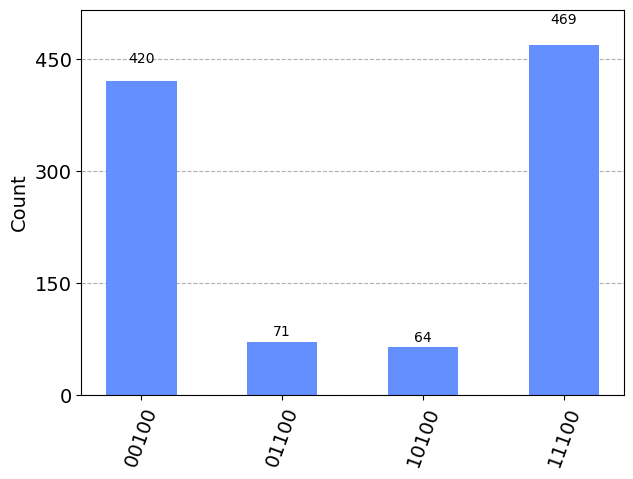

In [193]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [194]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_kyoto')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-17 20:40:32,130: Credentials are already in use. The existing account in the session will be replaced.


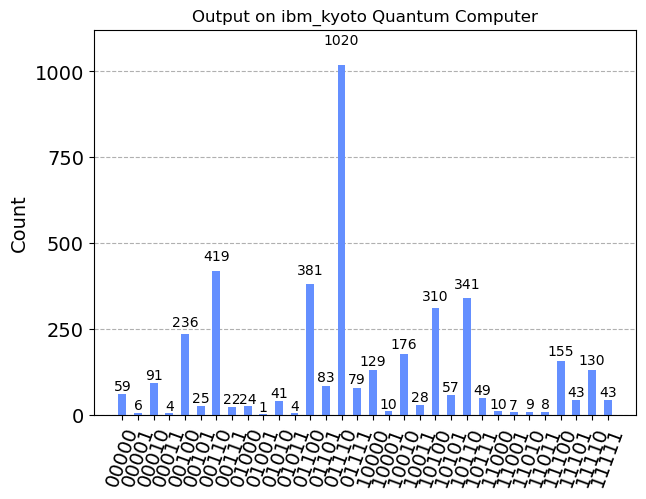

In [195]:
plot_histogram(job.get_counts(),title="Output on ibm_kyoto Quantum Computer")

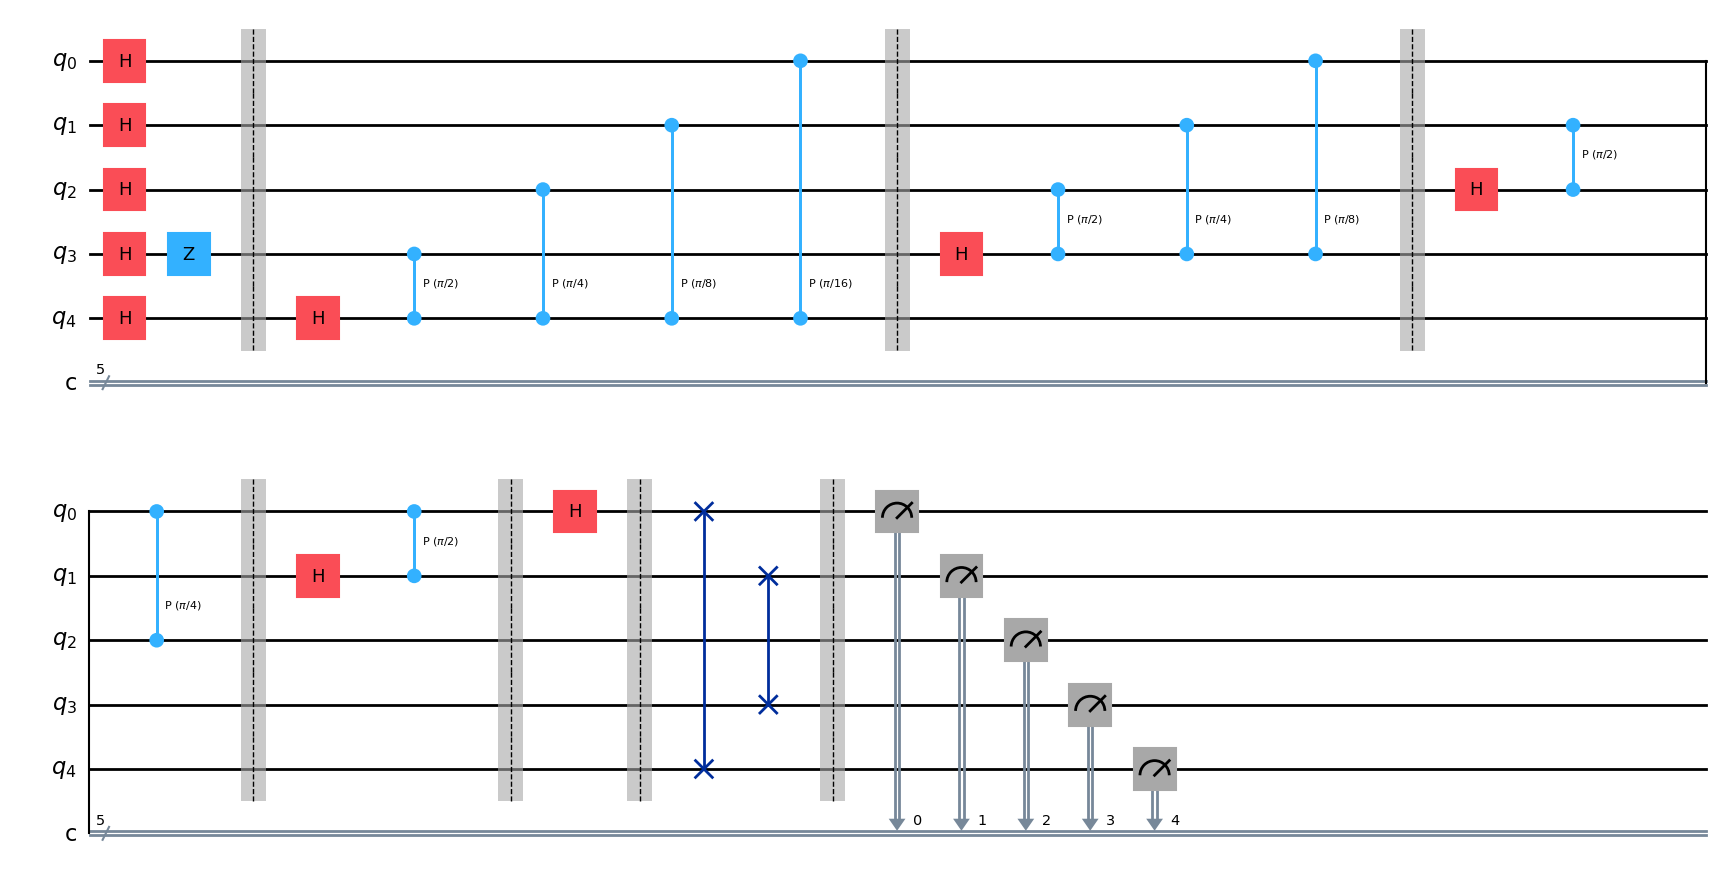

In [196]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(3)
qc.barrier()

qc.h(nqubit-1)
qc.cp(np.pi/2,3,4)
qc.cp(np.pi/4,2,4)
qc.cp(np.pi/8,1,4)
qc.cp(np.pi/16,0,4)
qc.barrier()

qc.h(nqubit-2)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()

qc.h(nqubit-3)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()

qc.h(nqubit-4)
qc.cp(np.pi/2,0,1)
qc.barrier()

qc.h(nqubit-5)
qc.barrier()

qc.swap(0,4)
qc.swap(1,3)
  
qc.barrier()
for i in range(nqubit):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

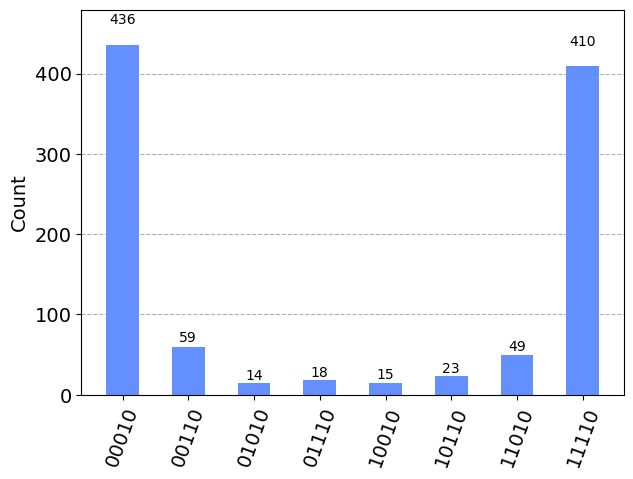

In [197]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [198]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_sherbrooke')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-17 20:46:14,933: Credentials are already in use. The existing account in the session will be replaced.


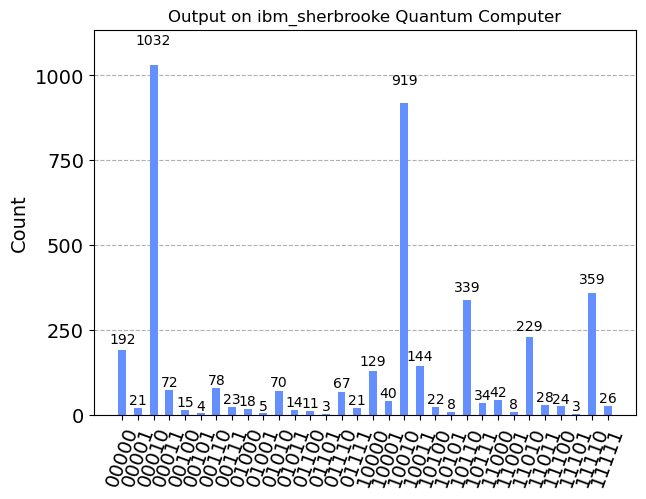

In [199]:
plot_histogram(job.get_counts(),title="Output on ibm_sherbrooke Quantum Computer")

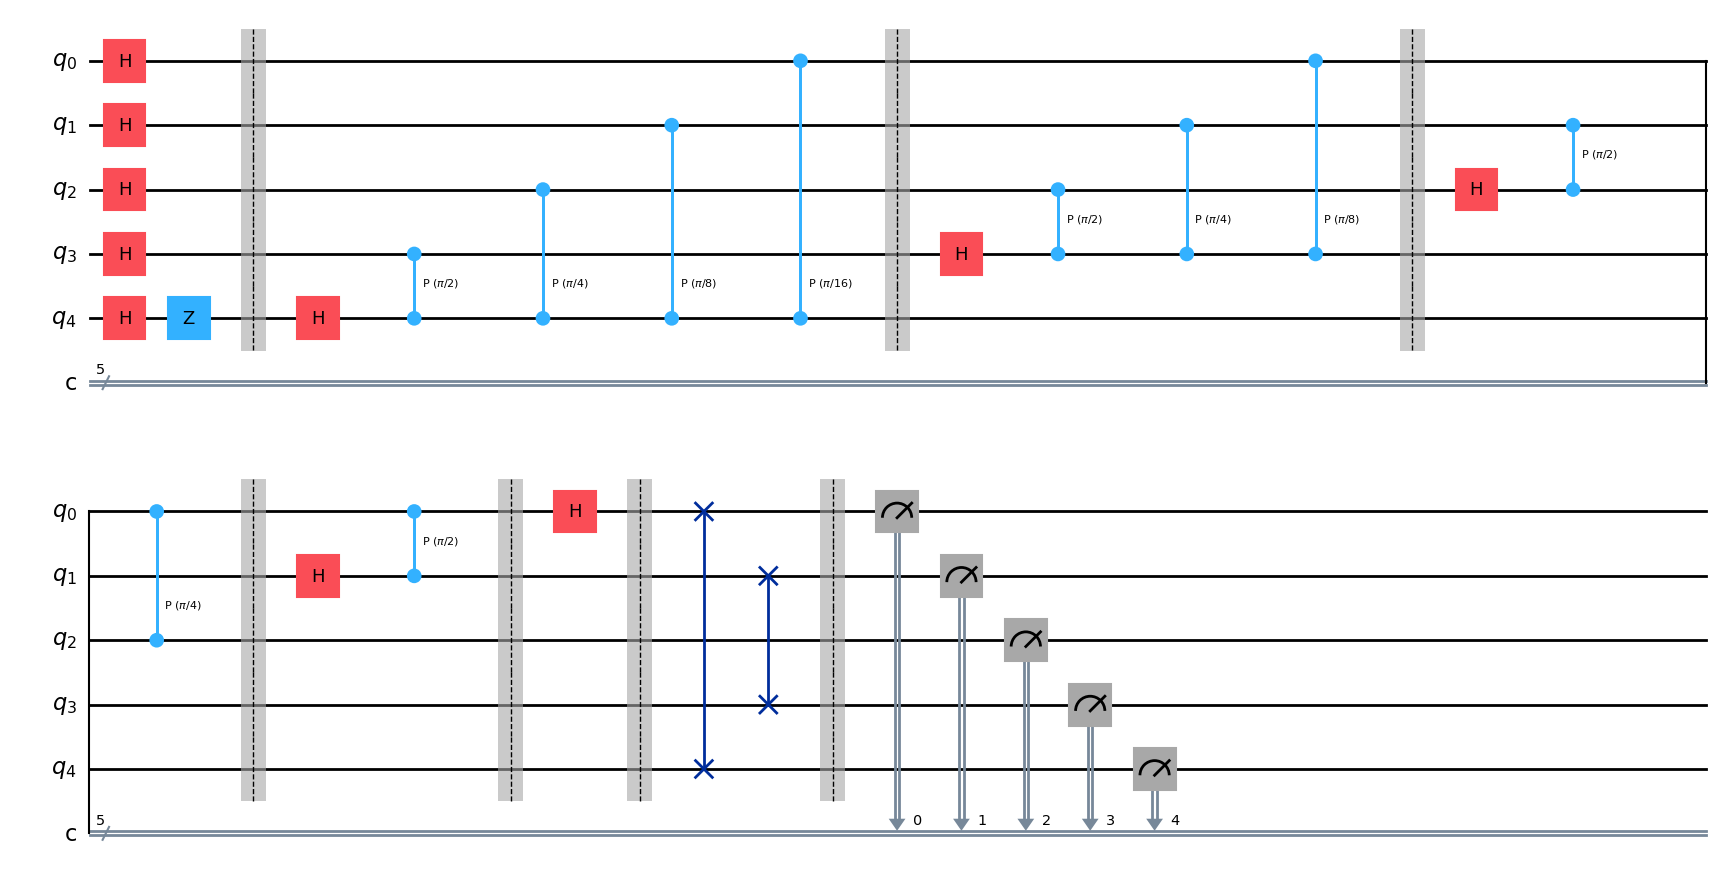

In [200]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(4)
qc.barrier()

qc.h(nqubit-1)
qc.cp(np.pi/2,3,4)
qc.cp(np.pi/4,2,4)
qc.cp(np.pi/8,1,4)
qc.cp(np.pi/16,0,4)
qc.barrier()

qc.h(nqubit-2)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()

qc.h(nqubit-3)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()

qc.h(nqubit-4)
qc.cp(np.pi/2,0,1)
qc.barrier()

qc.h(nqubit-5)
qc.barrier()

qc.swap(0,4)
qc.swap(1,3)
  
qc.barrier()
for i in range(nqubit):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

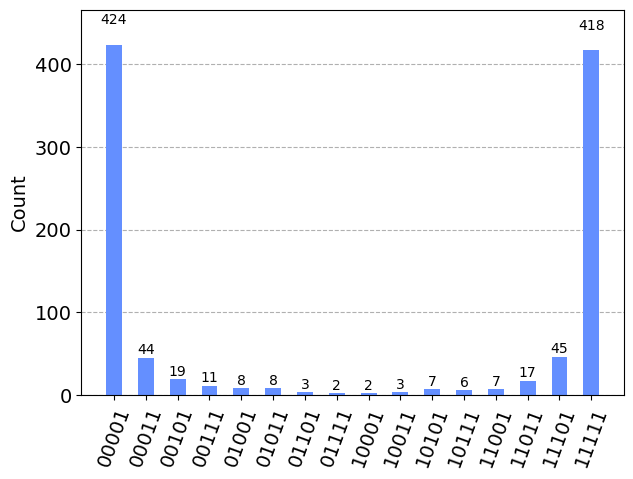

In [201]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [202]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()
qcom = provider.get_backend('ibm_sherbrooke')
job = execute(qc,backend=qcom).result()

ibmqfactory.load_account:WARNING:2024-04-17 20:53:24,547: Credentials are already in use. The existing account in the session will be replaced.


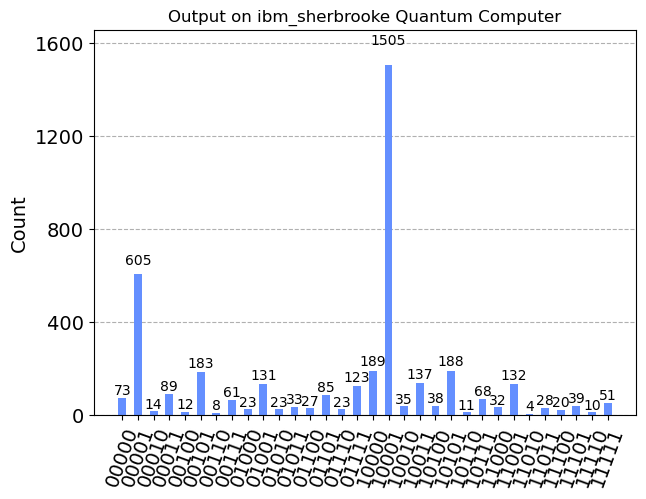

In [204]:
plot_histogram(job.get_counts(),title="Output on ibm_sherbrooke Quantum Computer")

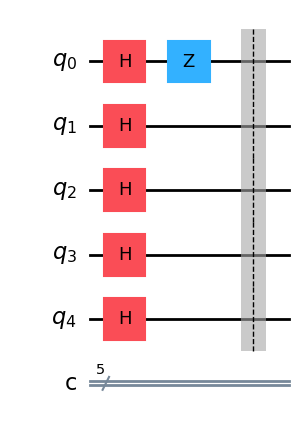

In [117]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(0)
qc.barrier()


qc.draw(output="mpl", style='iqp')

C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\192911033.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in range(0,len(amplitudes)):


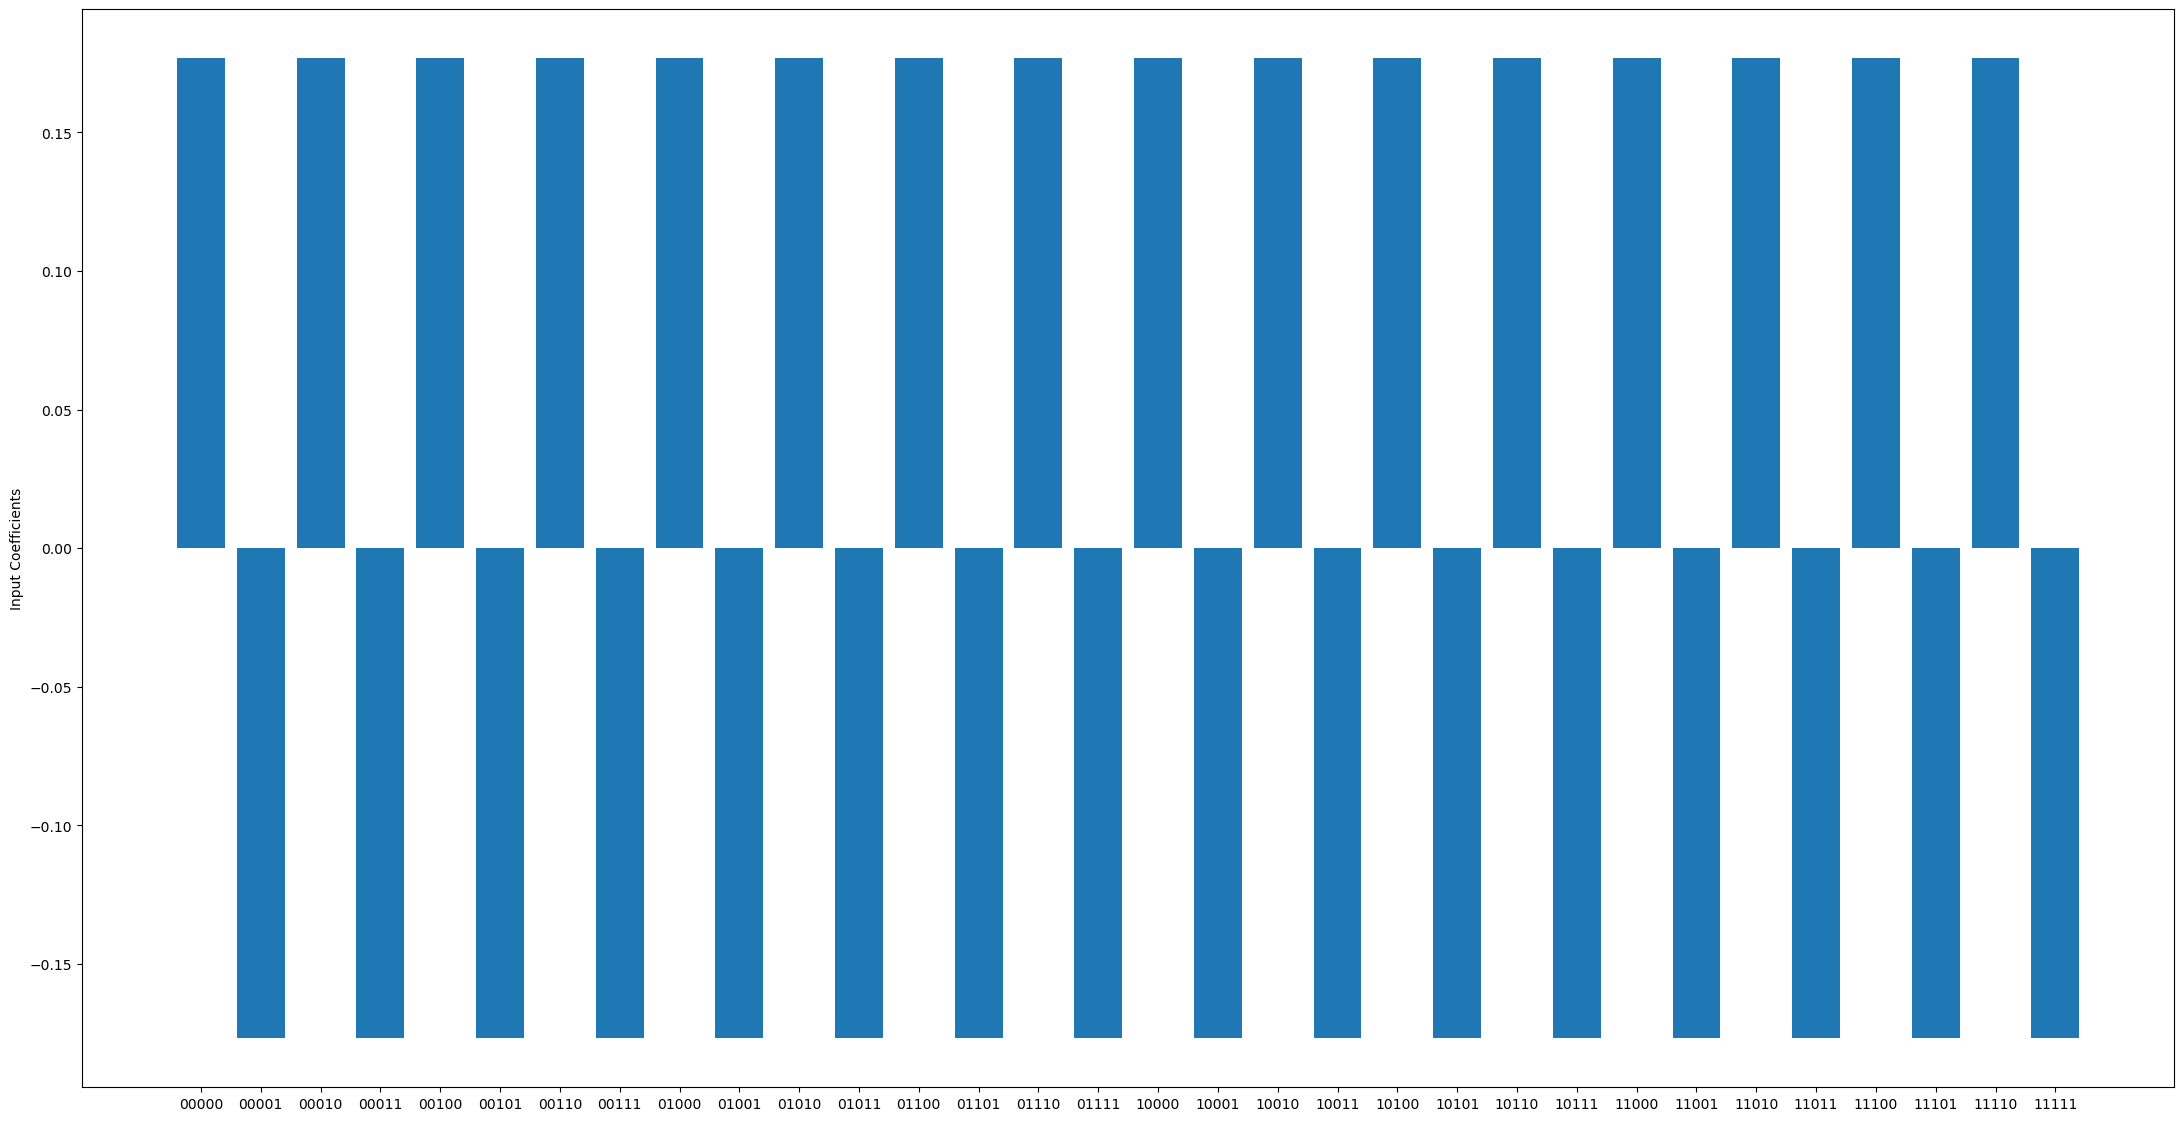

In [118]:
backend=Aer.get_backend('statevector_simulator')
result=execute(qc,backend).result()
statevector=result.get_statevector(qc)
amplitudes=(statevector)
# to use YYY as real arrays, use `np.asarray(YYY,float)`
binaries=[]
for i in range(0,len(amplitudes)):
    binaries +=['{0:05b}'.format(i)]
plt.figure(figsize=(27,14))    
plt.bar(binaries,amplitudes)
plt.ylabel('Input Coefficients')
plt.show()

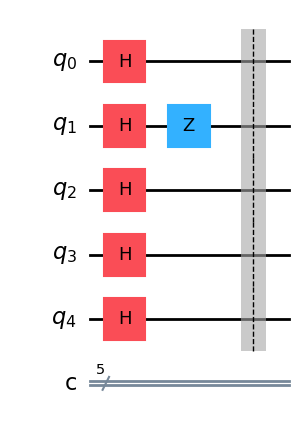

In [119]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(1)
qc.barrier()


qc.draw(output="mpl", style='iqp')

C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\1564386502.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in range(0,len(amplitudes)):


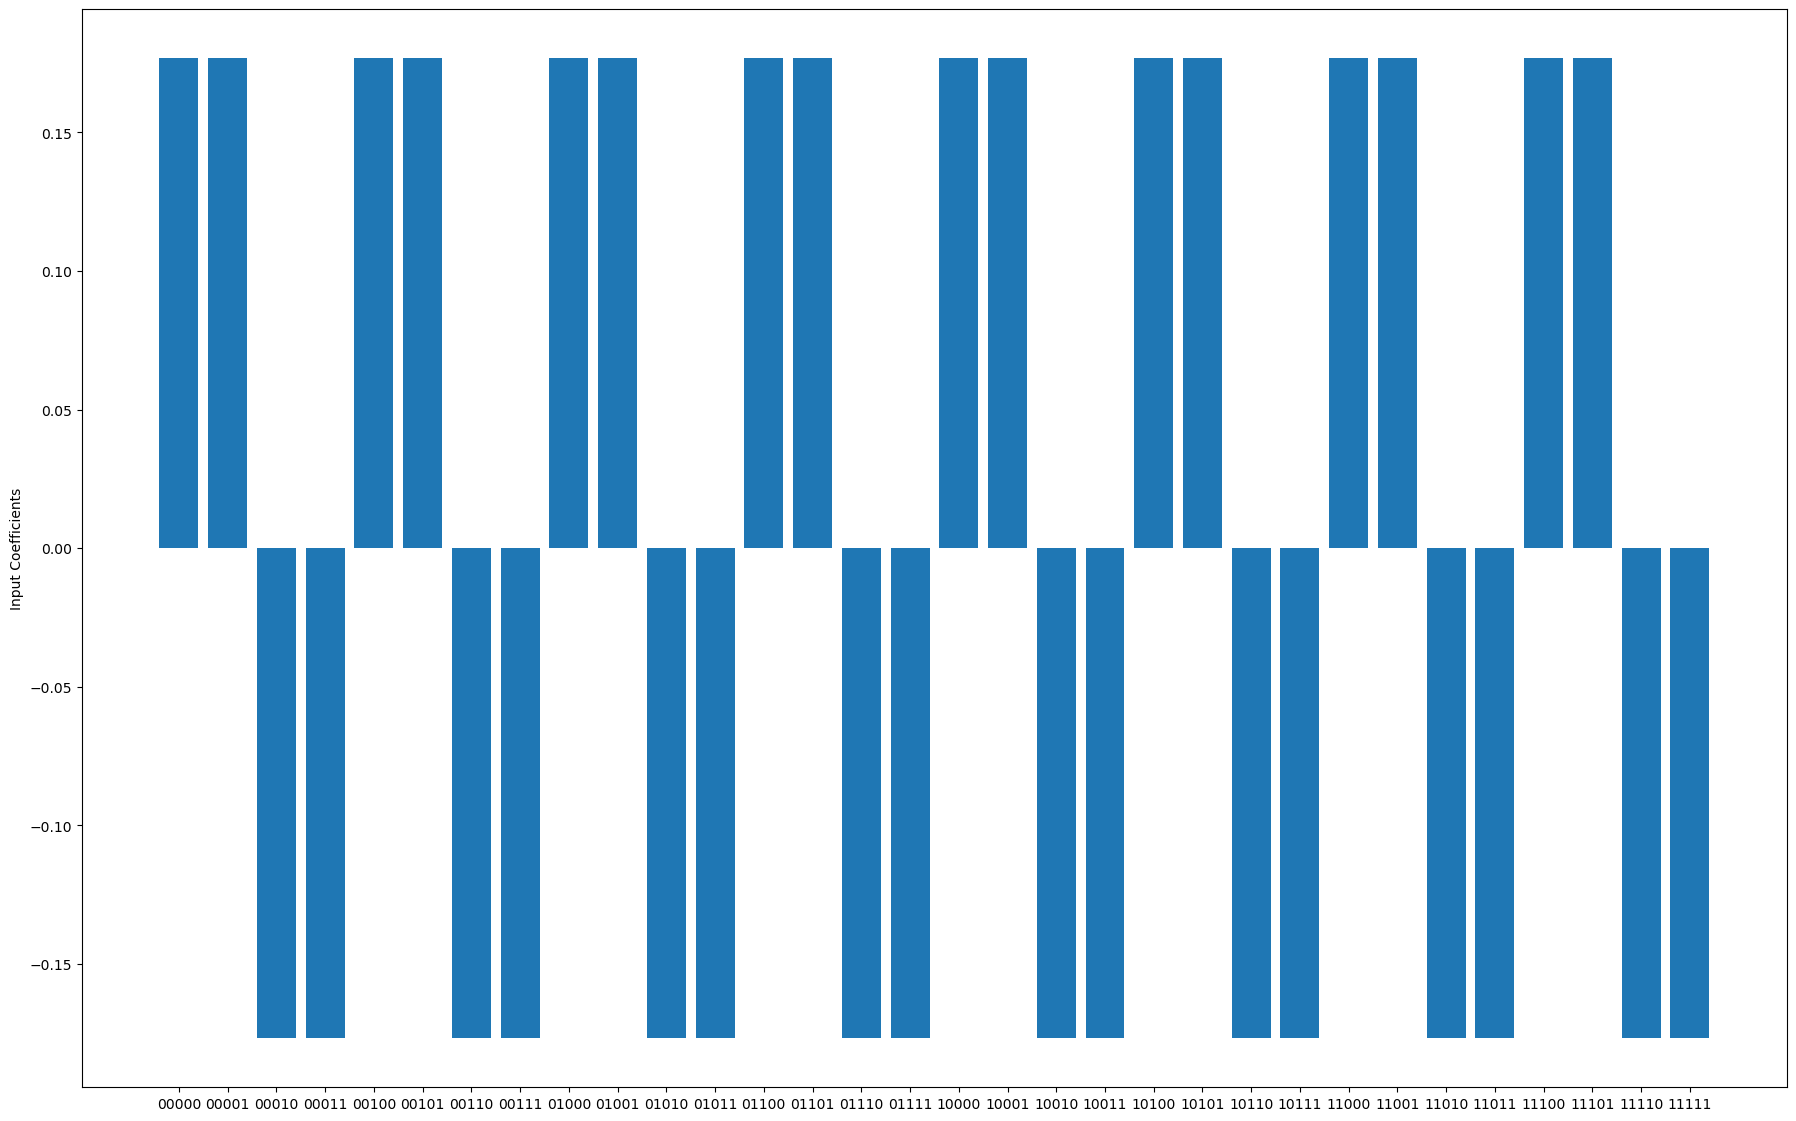

In [120]:
backend=Aer.get_backend('statevector_simulator')
result=execute(qc,backend).result()
statevector=result.get_statevector(qc)
amplitudes=(statevector)
# to use YYY as real arrays, use `np.asarray(YYY,float)`
binaries=[]
for i in range(0,len(amplitudes)):
    binaries +=['{0:05b}'.format(i)]
plt.figure(figsize=(22,14))    
plt.bar(binaries,amplitudes)
plt.ylabel('Input Coefficients')
plt.show()

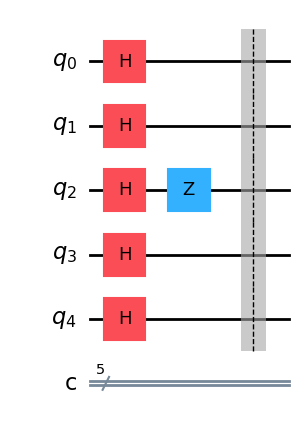

In [121]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(2)
qc.barrier()


qc.draw(output="mpl", style='iqp')

C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\1564386502.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in range(0,len(amplitudes)):


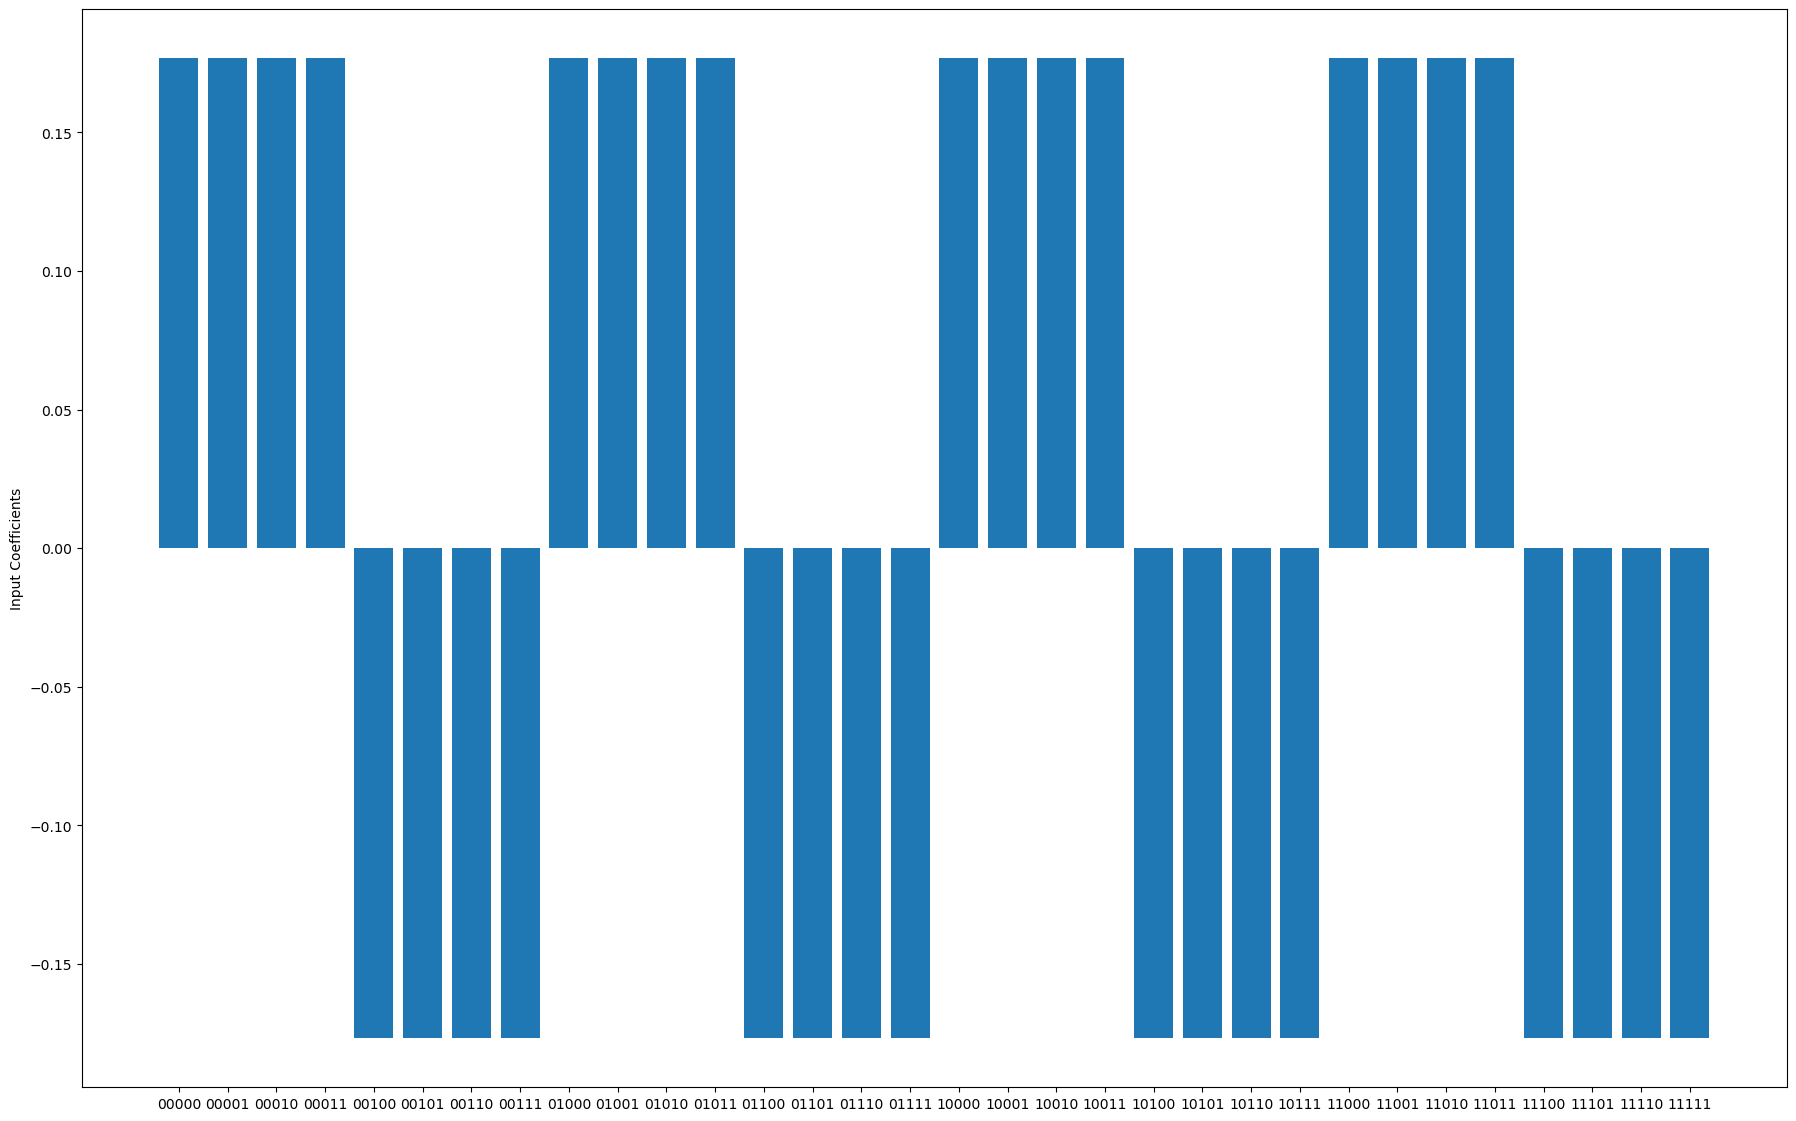

In [122]:
backend=Aer.get_backend('statevector_simulator')
result=execute(qc,backend).result()
statevector=result.get_statevector(qc)
amplitudes=(statevector)
# to use YYY as real arrays, use `np.asarray(YYY,float)`
binaries=[]
for i in range(0,len(amplitudes)):
    binaries +=['{0:05b}'.format(i)]
plt.figure(figsize=(22,14))    
plt.bar(binaries,amplitudes)
plt.ylabel('Input Coefficients')
plt.show()

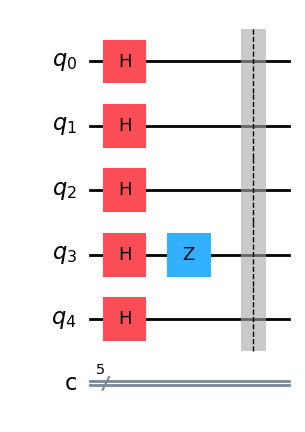

In [124]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(3)
qc.barrier()


qc.draw(output="mpl", style='iqp')

C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\1564386502.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in range(0,len(amplitudes)):


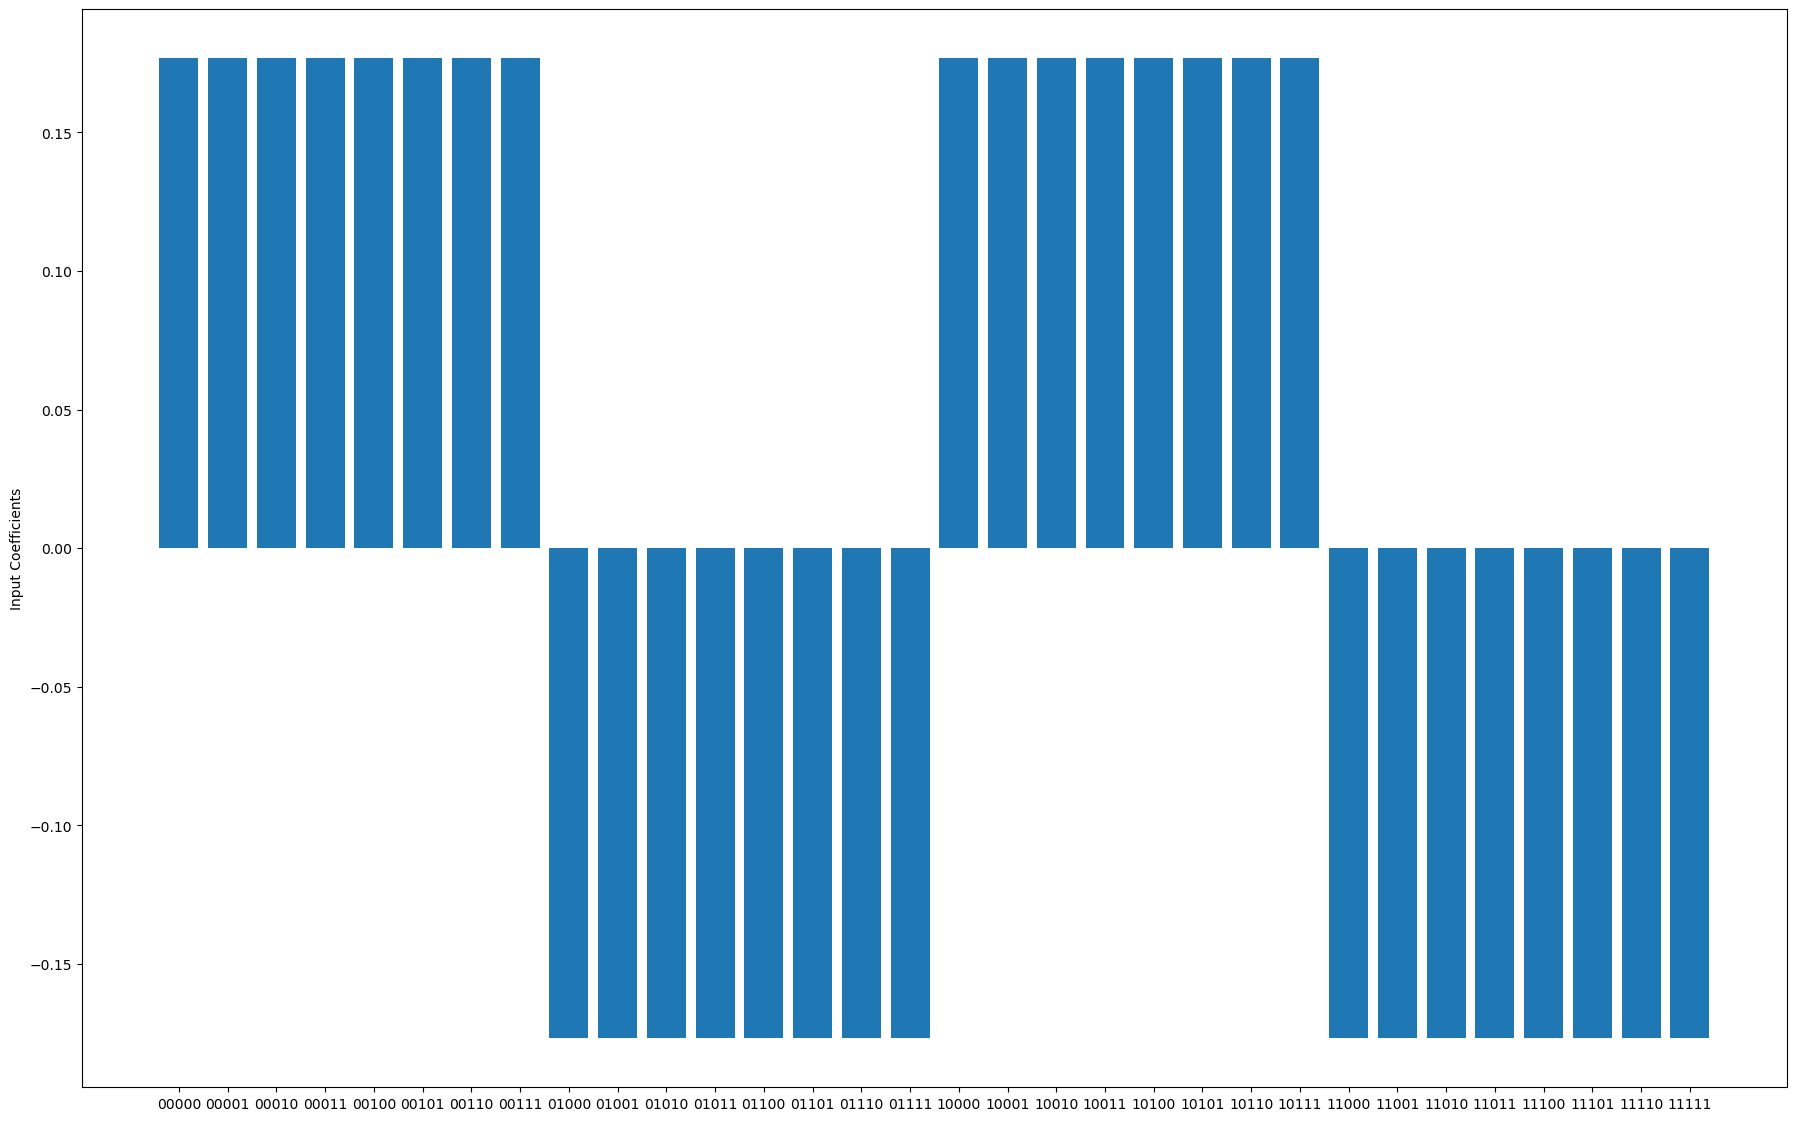

In [125]:
backend=Aer.get_backend('statevector_simulator')
result=execute(qc,backend).result()
statevector=result.get_statevector(qc)
amplitudes=(statevector)
# to use YYY as real arrays, use `np.asarray(YYY,float)`
binaries=[]
for i in range(0,len(amplitudes)):
    binaries +=['{0:05b}'.format(i)]
plt.figure(figsize=(22,14))    
plt.bar(binaries,amplitudes)
plt.ylabel('Input Coefficients')
plt.show()

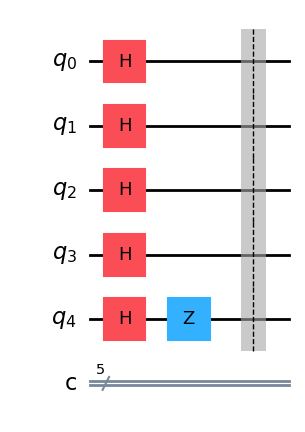

In [126]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(4)
qc.barrier()


qc.draw(output="mpl", style='iqp')

C:\Users\shahram\AppData\Local\Temp\ipykernel_8044\1564386502.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in range(0,len(amplitudes)):


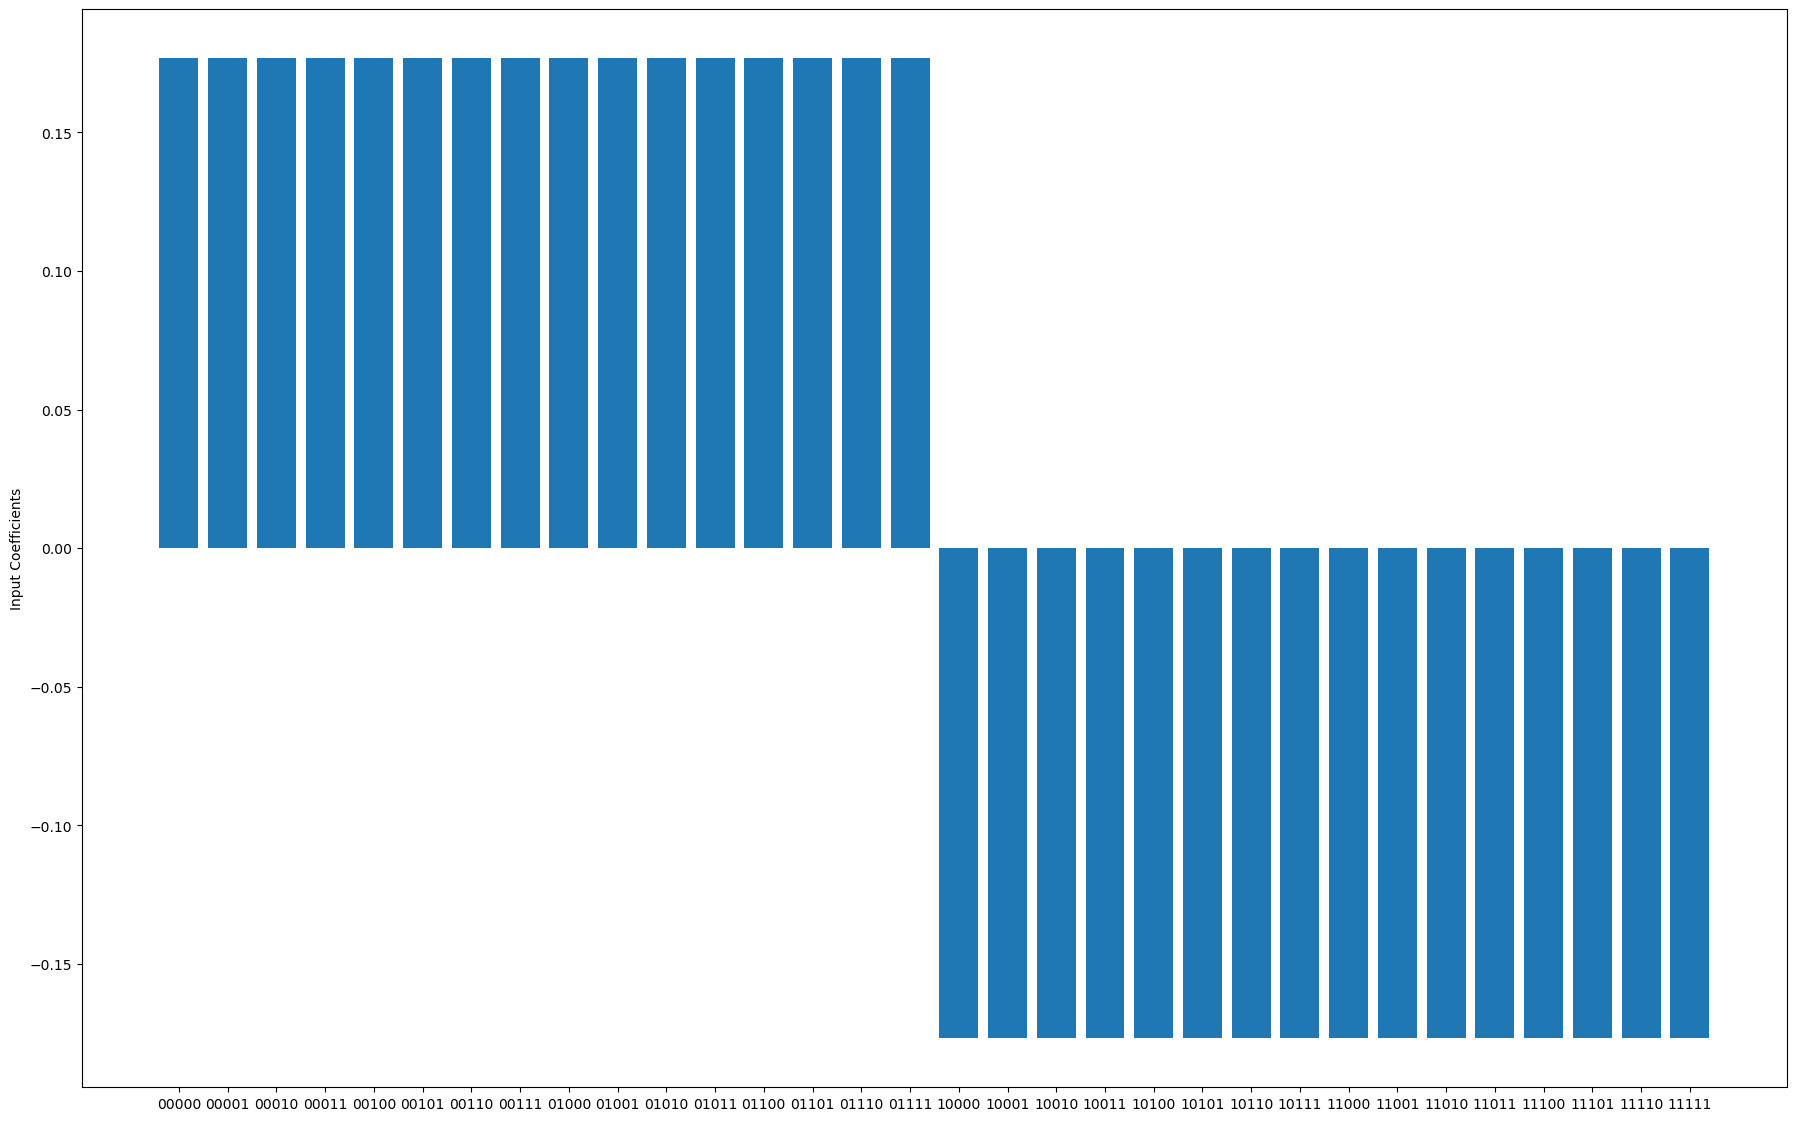

In [127]:
backend=Aer.get_backend('statevector_simulator')
result=execute(qc,backend).result()
statevector=result.get_statevector(qc)
amplitudes=(statevector)
# to use YYY as real arrays, use `np.asarray(YYY,float)`
binaries=[]
for i in range(0,len(amplitudes)):
    binaries +=['{0:05b}'.format(i)]
plt.figure(figsize=(22,14))    
plt.bar(binaries,amplitudes)
plt.ylabel('Input Coefficients')
plt.show()

In [205]:
qiskit.__qiskit_version__

NameError: name 'qiskit' is not defined

In [206]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

ModuleNotFoundError: No module named 'qiskit.ignis'

In [2]:
pip install qiskit-ignis

Using cached qiskit_ignis-0.7.1-py3-none-any.whl (198 kB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\shahram\AppData\Local\Temp\ipykernel_1692\1464280974.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)


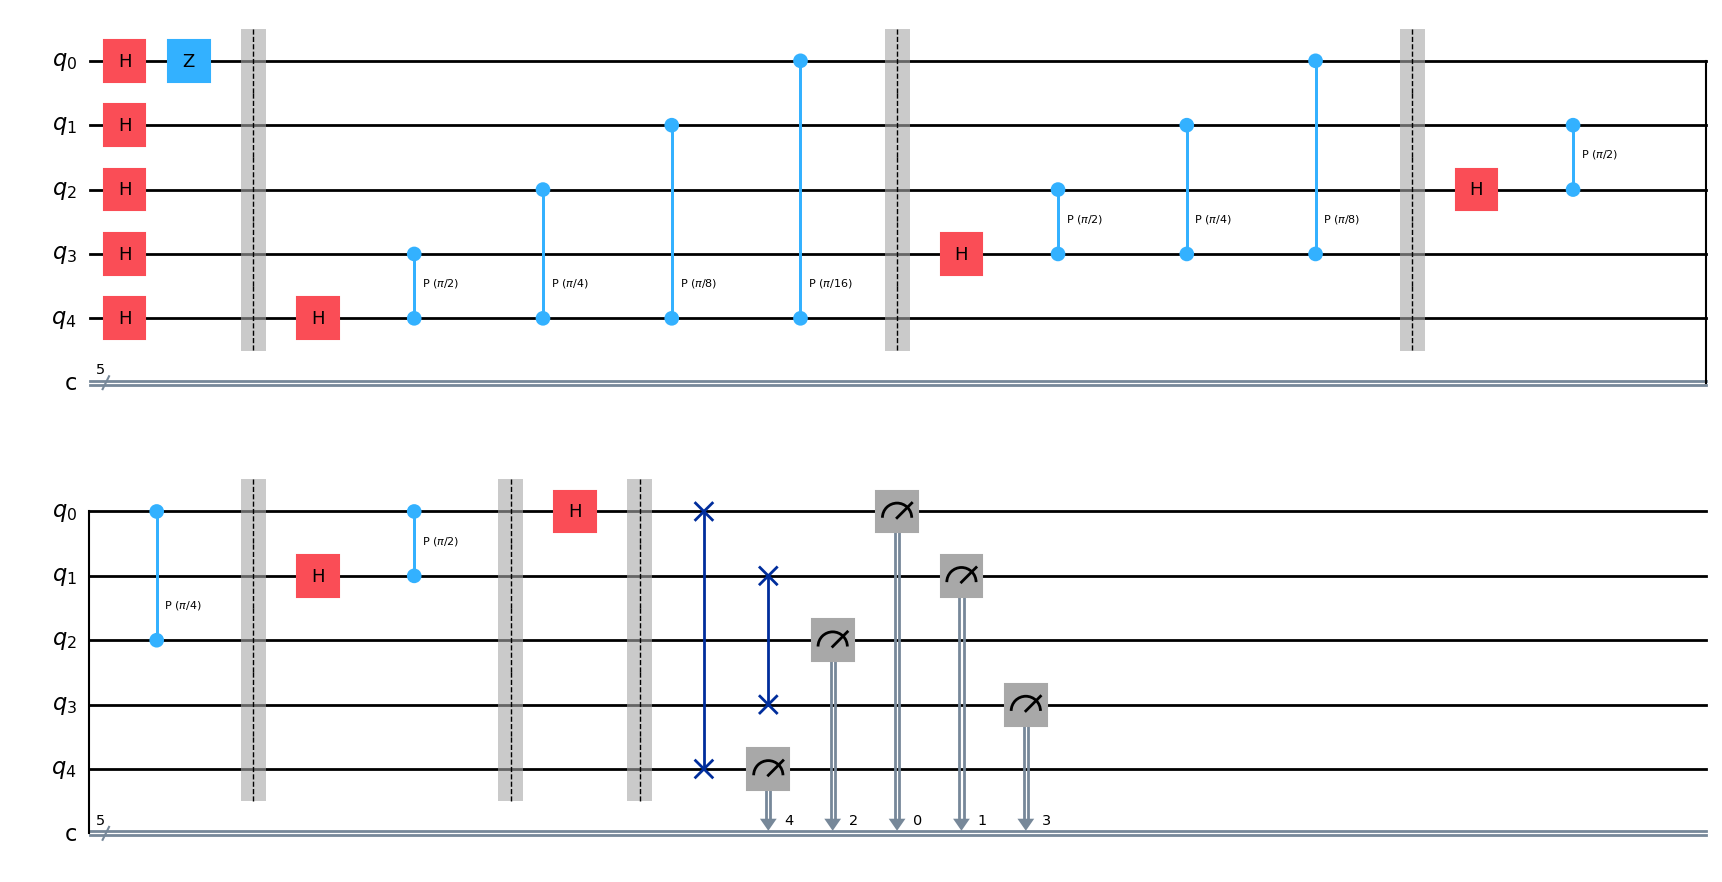

In [27]:
nqubit = 5
qc = QuantumCircuit(nqubit,nqubit)
for i in range (nqubit):
    qc.h(i)
qc.z(0)
qc.barrier()
qc.h(nqubit-1)
qc.cp(np.pi/2,3,4)
qc.cp(np.pi/4,2,4)
qc.cp(np.pi/8,1,4)
qc.cp(np.pi/16,0,4)
qc.barrier()
qc.h(nqubit-2)
qc.cp(np.pi/2,2,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/8,0,3)
qc.barrier()
qc.h(nqubit-3)
qc.cp(np.pi/2,1,2)
qc.cp(np.pi/4,0,2)
qc.barrier()
qc.h(nqubit-4)
qc.cp(np.pi/2,0,1)
qc.barrier()
qc.h(nqubit-5)
qc.barrier()
qc.swap(0,4)
qc.swap(1,3)
for i in range(nqubit):
    qc.measure(i,i)
qc.draw(output='mpl',style='iqp')

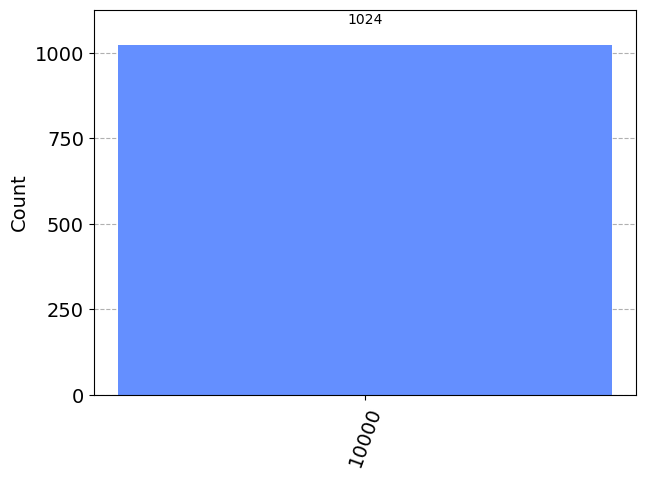

In [28]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(qc,backend=simulator,shots = 1024)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts())

In [29]:
qcom = provider.get_backend('ibm_brisbane')
job = execute(qc,backend=qcom).result()

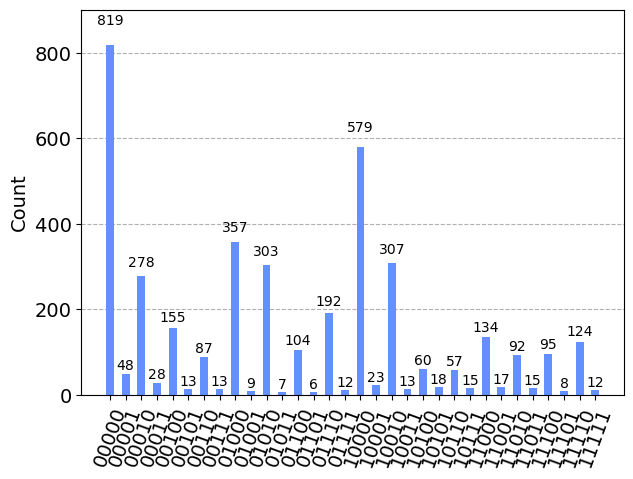

In [30]:
result1 = job.get_counts()
plot_histogram(result1)

In [31]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

In [32]:
cal_circuits, state_labels = complete_meas_cal(qr = qc.qregs[0], circlabel="measerrormitigation")

In [33]:
len(cal_circuits)

32

In [34]:
device = provider.get_backend('ibm_brisbane')
cal_job = execute(cal_circuits,backend=device,shots=1024,optimization_level=0)
print(cal_job.job_id())


crgm0sbwverg008vxag0


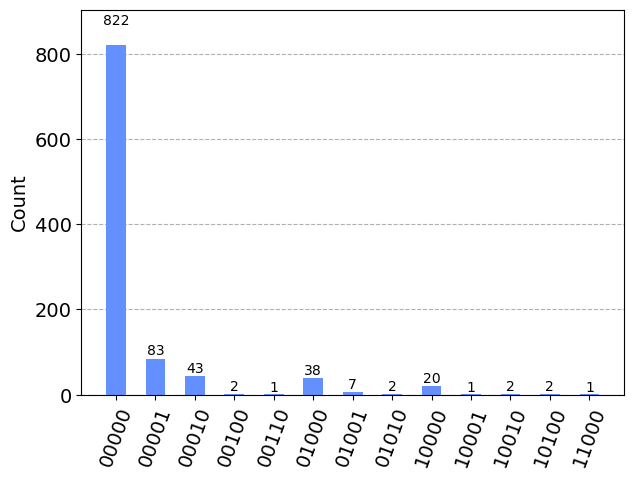

In [35]:
cal_result = cal_job.result()
plot_histogram(cal_result.get_counts(cal_circuits[0]))

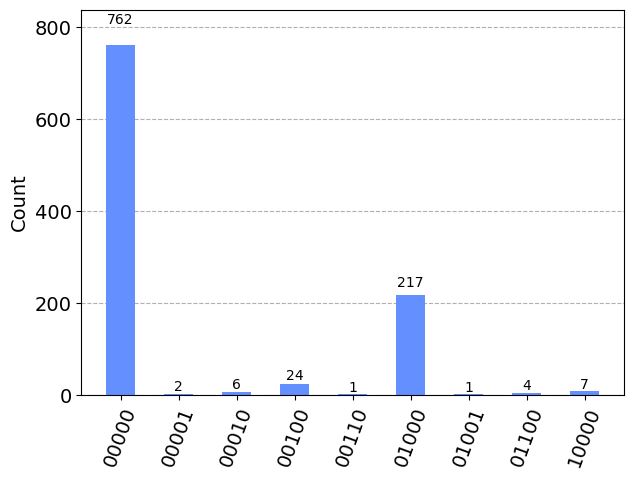

In [23]:
meas_fitter = CompleteMeasFitter(cal_result, state_labels)

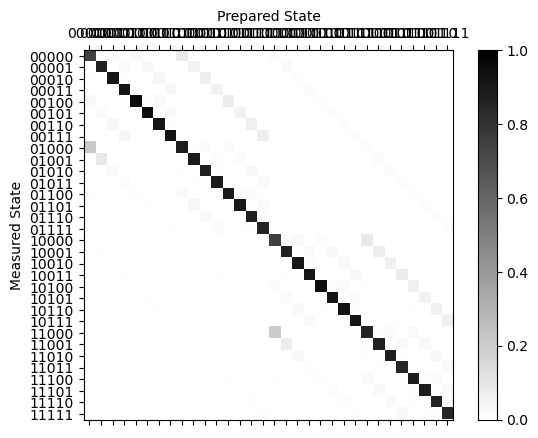

In [24]:
meas_fitter.plot_calibration()

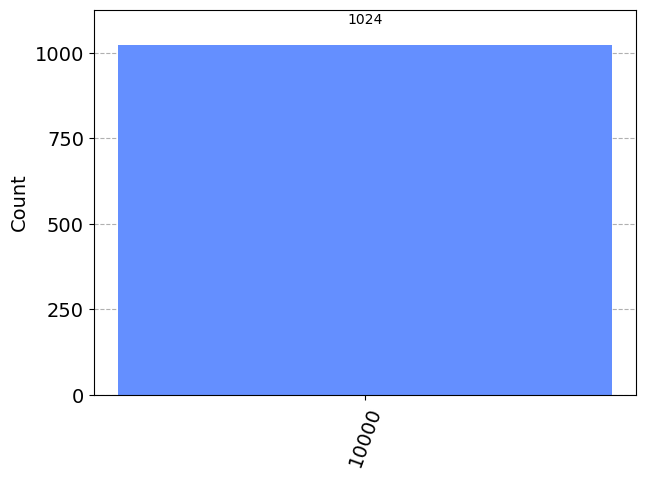

In [19]:
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(result1)

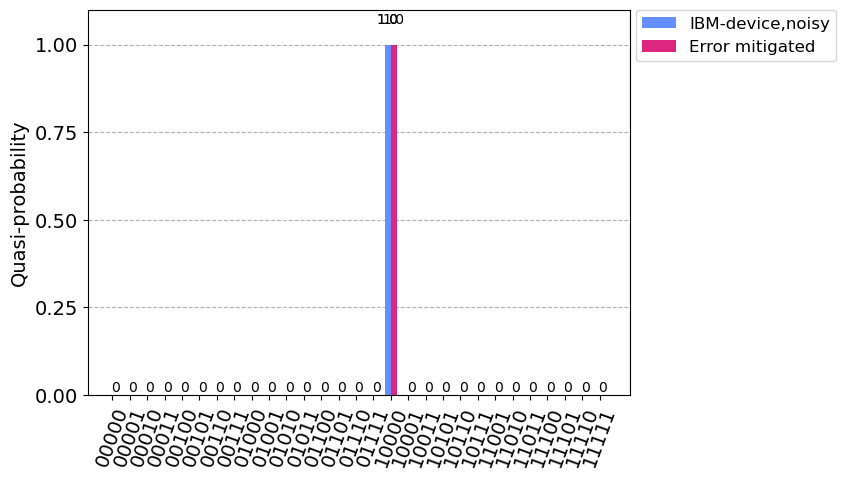

In [20]:
#print(mitigated_result.get_)
#device_counts = result1.get_counts(circuit)
#mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([result1,mitigated_result], legend=["IBM-device(noisy)","IBM-device after error mitigation"])